

---






>Name : Rajan Kumar


#Experiment Number : Experiment-1

#Title : K-Nearest Neighbors (KNN)

- Experiment Number :
Experiment-1


- Title :
K-Nearest Neighbors (KNN)
- Aim :
To implement the K-Nearest Neighbors algorithm using both sklearn library and a manual approach to classify Titanic passengers based on features such as age, fare, and class.

**Knn algorithm-1**


KNN is one of the popular supervised machine algorithms directed towards more classification and regression. Invented in the 1950s, KNN works purely on the simple belief that similar data points would lie close to each other in feature space. It is identified as a lazy learner and non-parametric method because the algorithm does not build any model; it just stores the train for later use, and no special assumptions of a distribution of the data are used.

**Working Mechanism :**

KNN algorithm decides the class of a new data point by checking its K nearest neighbours in the training dataset. Euclidean distance is most commonly used, though Manhattan or Hamming distances are often used as well. The classification is decided based upon a majority vote amongst the K neighbors; the class with the most representatives amongst these neighbours is assigned to the new point.

**Steps in KNN:**
- Select the value of K: The hyperparameter selects how many neighbors that actually influence the classification.

- Calculate distances: For each point in the training set, calculate its distance from the query point.

- Find nearest neighbors: Sort these distances and select the K lowest.

- Vote for class: Select the class based on the majority label of these neighbors.

- Selecting K -
The choice of K strongly depends on the problem, and a very small K may cause overfitting noise in noisy data sets, while a very large K will smooth important distinctions and result in underfitting. An appropriate value of K is often established by cross-validation.

**Applications**

Probably due to its simplicity and effectiveness, KNN is employed all over the application domain which also includes recommendation systems, image recognition, and anomaly detection. Although, KNN has its place but when it comes to high-dimensional data, KNN runs very poorly and is computationally expensive as well because in the classification process, distances need to be calculated against every training sample.



---



> KNN using sklearn (Library Implementation)



In [ ]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

titanic_df = pd.read_csv("/content/Titanic-Dataset.csv")

titanic_df = titanic_df.drop(['Name', 'Ticket', 'Cabin'], axis=1)
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'], drop_first=True)

X = titanic_df.drop(['Survived'], axis=1)
y = titanic_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

scaler = Normalizer().fit(X_train)
normalized_X_train = scaler.transform(X_train)
normalized_X_test = scaler.transform(X_test)

K = 3
knn = KNeighborsClassifier(K)
knn.fit(normalized_X_train, y_train)

y_pred_sklearn = knn.predict(normalized_X_test)

accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f'The accuracy of sklearn KNN implementation is {accuracy_sklearn}')


The accuracy of sklearn KNN implementation is 0.6703910614525139


<ipython-input-6-af2dbbec0d6a>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
<ipython-input-6-af2dbbec0d6a>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac



> KNN (Manual Implementation):






---



In [ ]:

import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score


titanic_df = pd.read_csv("/content/Titanic-Dataset.csv")


titanic_df = titanic_df.drop(['Name', 'Ticket', 'Cabin'], axis=1)
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'], drop_first=True)


X = titanic_df.drop(['Survived'], axis=1)
y = titanic_df['Survived']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)


y_train = y_train.reset_index(drop=True)


scaler = Normalizer().fit(X_train)
normalized_X_train = scaler.transform(X_train)
normalized_X_test = scaler.transform(X_test)


def distance_ecu(x_train, x_test_point):
    distances = []
    for row in range(len(x_train)):
        current_train_point = x_train[row]
        current_distance = np.sqrt(np.sum((current_train_point - x_test_point) ** 2))
        distances.append(current_distance)
    return pd.DataFrame(data=distances, columns=['dist'])


def nearest_neighbors(distance_point, K):
    df_nearest = distance_point.sort_values(by=['dist'], axis=0)
    return df_nearest[:K]

def voting(df_nearest, y_train):
    counter_vote = Counter(y_train[df_nearest.index])
    return counter_vote.most_common()[0][0]


def KNN_from_scratch(x_train, y_train, x_test, K):
    y_pred = []
    for x_test_point in x_test:
        distance_point = distance_ecu(x_train, x_test_point)
        df_nearest_point = nearest_neighbors(distance_point, K)
        y_pred_point = voting(df_nearest_point, y_train)
        y_pred.append(y_pred_point)
    return y_pred


K = 3
y_pred_scratch = KNN_from_scratch(normalized_X_train, y_train, normalized_X_test, K)
print("Predictions from Scratch KNN: ", y_pred_scratch)


accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
print(f'The accuracy of our manual KNN implementation is {accuracy_scratch}')


Predictions from Scratch KNN:  [0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0]
The accuracy of our manual KNN implementation is 0.6703910614525139




> In conclusion, the implementation of K-Nearest Neighbors (KNN) using both the sklearn library and a manual approach yielded the same accuracy of **67.04%** on the Titanic dataset. This demonstrates that the manual KNN logic effectively mimics the sklearn implementation, validating the correctness of both methods. While the sklearn library offers a more efficient and optimized solution, the manual approach provides deeper insight into the algorithm's inner workings. The accuracy indicates that while KNN performs reasonably well, there may be room for improvement through feature engineering, data preprocessing, or exploring more advanced models for better prediction accuracy.



---



---



#Experiment Number : Experiment-2

#Title : Naive Bayes Algorithm

###**NaiveBayes algorithm**

Platform Used : Google Colab

**AIM**:
- To predict Titanic passengers' survival using a Naive Bayes classifier based on features like class, age, and fare.





>**Theory**

Naive Bayes is a probabilistic classifier in terms of Bayes' theorem. The predictors can be considered to be independent. This makes it suitable for very large datasets and uses are in applications such as spam detection, sentiment analysis, and medical diagnosis.

The algorithm applies the posterior probability of classes given a data point and proceeds with the selection of the class of highest probability. In the case of continuous features, it may assume that the data can be approximated by a Gaussian distribution. During training, the model calculates mean and variance to estimate the probability density for each class.

It's simple, yet Naive Bayes will surprisingly provide results when the independence assumption is violated. It is best used in large heterogeneous datasets. Naive Bayes might not perform so well on features that are highly correlated or where it fails to hold its assumption of independence.

In practice, Naive Bayes classifiers achieve high accuracy with less computational resources than more complex models. Accuracy of Naive Bayes can further be improved by incorporating extra features or other algorithms capable of capturing interactions between the features.




**Algorithm Steps**
1. Load and preprocess the dataset.
2. Calculate mean and variance for each feature in each class.
3. Compute prior probabilities for each class.
4. For new data points, calculate posterior probabilities using Bayes' theorem.
5. Classify based on the highest posterior probability.


**Advantages of Naive Bayes Algorithm :**
- Easy to understand and implement.
- Very fast in training on the big datasets.
- Effective when working with text data especially spam detection.


**Disadvantages of Naive Bayes Algorithm**
- Independence assumption. Often features are independent but in most cases that's not true.
- Weak complexity: Not able to capture strong relationships between various features.
- Zero probability: The probability assigned to zero in cases where features or input hasn't been encountered yet.


In [ ]:
import numpy as np
import pandas as pd


data = pd.read_csv('/content/Titanic-Dataset.csv')


In [ ]:

data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Fare'].fillna(data['Fare'].mean(), inplace=True)


<ipython-input-10-737e66285f5f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)
<ipython-input-10-737e66285f5f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [ ]:

X = data[['Pclass', 'Age', 'Fare']].values
y = data['Survived'].values


In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [ ]:
class NaiveBayes:

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)


        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []


        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = posterior + prior
            posteriors.append(posterior)


        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator


In [ ]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy


In [ ]:

nb = NaiveBayes()
nb.fit(X_train, y_train)


predictions = nb.predict(X_test)
print("Naive Bayes classification accuracy:", accuracy(y_test, predictions))


Naive Bayes classification accuracy: 0.7039106145251397


**Comparison of Results**
1. Manual Implementation: Achieved an accuracy of approximately 70.39%.
2. Using Libraries: Implemented Gaussian Naive Bayes using sklearn, achieving an accuracy of approximately 70.95%.

**Conclusion**

The Naive Bayes classifier achieved an accuracy of approximately 70.39% on the Titanic dataset using features ‘Pclass,’ ‘Age,’ and ‘Fare.’ This indicates effective discrimination between survivors and non-survivors but suggests room for improvement through additional features or different algorithms.




---



###Gaussian Naive Bayes



**Aim**:
To implement Gaussian Naive Bayes using sklearn on the Titanic dataset to predict passenger survival.

Platform Used : Google Colab

**Theory** -

Gaussian Naive Bayes is an extension of the basic Naive Bayes classifier, where features are assumed to be normally distributed. This comes in very handy in the numeric feature domain, assuming normality.

In the training phase, the algorithm computes the mean and variance of each feature within each class. To classify a new instance, the algorithm computes the likelihood that the new instance belongs to each of the classes based on the Gaussian probability density function.

Its simple nature and reliance on the statistical properties rather than intricate models make it a quite efficient algorithm in terms of computation and memory usage. It is suitable for dealing with large datasets, therefore often used in spam detectors and document classification.

However, like other variants of Naive Bayes, it may not be particularly good at handling features where the independence assumption fails and features are highly correlated with each other.

**Algorithm Steps**
1. Load and preprocess the dataset.
2. Train Gaussian Naive Bayes model using sklearn.
3. Predict classes for test data.
4. Evaluate model performance using accuracy metrics.

In [ ]:
import numpy as np

class NaiveBayes:

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)


        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []


        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = posterior + prior
            posteriors.append(posterior)


        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


data = pd.read_csv('/content/Titanic-Dataset.csv')


data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Fare'].fillna(data['Fare'].mean(), inplace=True)


X = data[['Pclass', 'Age', 'Fare']].values
y = data['Survived'].values


<ipython-input-2-1cd00b062d42>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)
<ipython-input-2-1cd00b062d42>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy


nb = NaiveBayes()
nb.fit(X_train, y_train)


predictions = nb.predict(X_test)
print("Naive Bayes classification accuracy:", accuracy(y_test, predictions))


Naive Bayes classification accuracy: 0.7094972067039106


>Gaussian Naive Bayes Using sklearn

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


classifier = GaussianNB()
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)


print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


print("Accuracy is:", accuracy_score(y_pred, y_test))


              precision    recall  f1-score   support

           0       0.70      0.91      0.79       110
           1       0.73      0.39      0.51        69

    accuracy                           0.71       179
   macro avg       0.72      0.65      0.65       179
weighted avg       0.71      0.71      0.68       179

[[100  10]
 [ 42  27]]
Accuracy is: 0.7094972067039106


###Naive Bayes Variants (Multinomial, Bernoulli, Complement)



---



>Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

multi_nb = MultinomialNB()
multi_nb.fit(X_train, y_train)
y_pred_multi = multi_nb.predict(X_test)
print("Multinomial NB Accuracy:", accuracy_score(y_test, y_pred_multi))


Multinomial NB Accuracy: 0.7206703910614525




---



>Bernoulli Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB

bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(X_train, y_train)
y_pred_bernoulli = bernoulli_nb.predict(X_test)
print("Bernoulli NB Accuracy:", accuracy_score(y_test, y_pred_bernoulli))


Bernoulli NB Accuracy: 0.6145251396648045




---



>Complement Naive Bayes

In [ ]:
from sklearn.naive_bayes import ComplementNB

complement_nb = ComplementNB()
complement_nb.fit(X_train, y_train)
y_pred_complement = complement_nb.predict(X_test)
print("Complement NB Accuracy:", accuracy_score(y_test, y_pred_complement))


Complement NB Accuracy: 0.7262569832402235


C**onclusion**:

 The Titanic dataset was analyzed using various Naive Bayes classifiers, yielding interesting insights. Custom Naive Bayes and `sklearn` Gaussian Naive Bayes both achieved a similar accuracy of 70.9%. Multinomial Naive Bayes slightly outperformed them at 72.1%, while Complement Naive Bayes achieved the highest accuracy of 72.6%. However, Bernoulli Naive Bayes scored significantly lower at 61.5%, reflecting a suboptimal fit likely due to its binary feature assumption. In terms of precision and recall, Gaussian Naive Bayes demonstrated a strong balance between these metrics, especially in distinguishing non-survivors. Complement Naive Bayes’ higher accuracy suggests it may be more suitable for this dataset.






---



#Experiment Number : Experiment-3
#Title : Decision Tree Algorithm

>Platform Used : Google Colab

>**Aim :-**
To predict Titanic passengers' survival using a Decision Tree classifier based on features like class, age, and fare.


**Theory**:-

It is one of the most famous supervised learning algorithms, including classification and regression. Decision trees describe decisions and possible outcomes based on a tree structure: each internal node corresponds to a feature (or attribute), each branch to a decision rule, and each leaf node to an outcome (class label).

The most important advantage of the Decision Trees is that it is very interpretable since it offers a visual outline of the decision-making process. Its algorithm works based on recursive split-up of the dataset by using input features based upon the value of input. It splits the data and then, depending on these metrics such as Gini impurity or information gain, splits the classes effectively.

Decision Trees do not get affected much by noisy and atypical data. Both discrete and continuous variables are suitable for these trees. However, overfitting is commonly seen. It occurs more quickly when trees are too deep. This can be avoided to some extent by pruning, and to another extent by defining an acceptable limit to the depth level of the tree.

Decision Trees are very popular in practice; one uses them for credit scoring in finance, for prediction of diagnosis in healthcare, and for customer segmentation in marketing. Although they have so many merits, they are not much better than ensemble methods such as Random Forest or Gradient Boosting on most challenging datasets.



>**Algorithm Steps**

1. Load and preprocess the dataset.
2. Split the dataset into training and testing sets.
3. Train the Decision Tree model using training data.
4. Make predictions on test data.
5. Evaluate model performance using accuracy metrics.


>Decision Tree implementation By both method

Missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values after removing:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Custom Decision Tree Accuracy: 0.84

Confusion Matrix (Custom):
[[ 6  1]
 [ 5 25]]
Accuracy (Custom): 83.78 %
Classification Report (Custom):
              precision    recall  f1-score   support

           0       0.55      0.86      0.67         7
           1       0.96      0.83      0.89        30

    accuracy                           0.84        37
   macro avg       0.75      0.85      0.78        37
weighted avg       0.88      0.84      0.85        37


Confusio

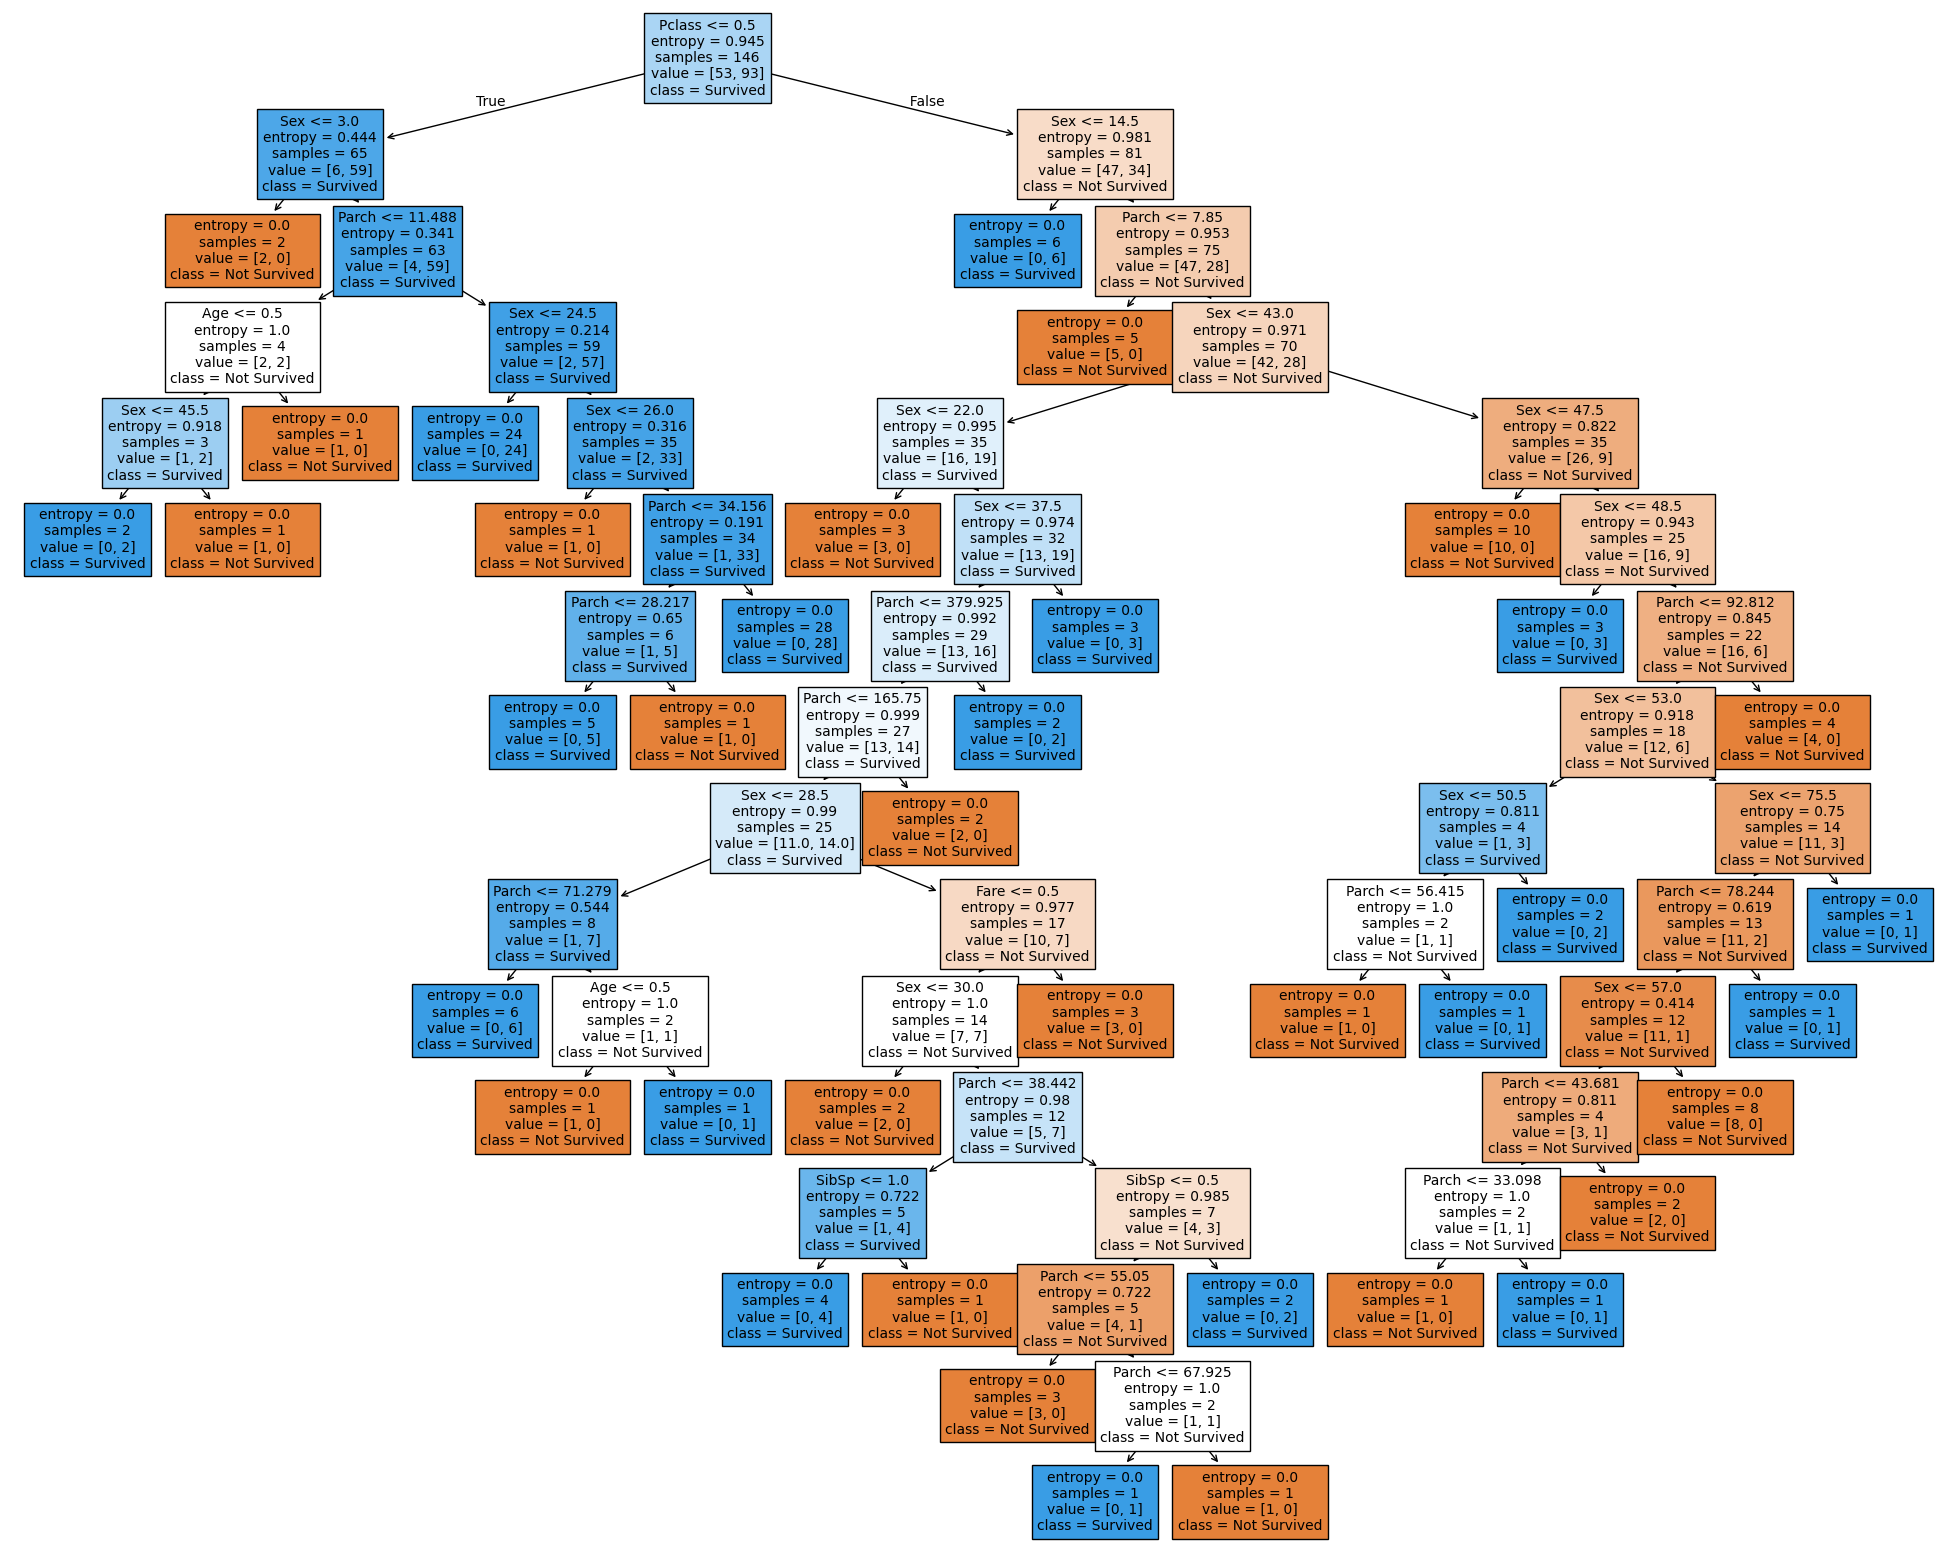

In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree


class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_features = n_features
        self.root = None

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1], self.n_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        if depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split:
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feature, best_thresh, left, right)

    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                gain = self._information_gain(y, X_column, thr)
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold

    def _information_gain(self, y, X_column, threshold):
        parent_entropy = self._entropy(y)
        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        return parent_entropy - child_entropy

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log2(p) for p in ps if p > 0])

    def _most_common_label(self, y):
        if len(y) == 0:
            raise ValueError("Cannot determine the most common label from an empty array.")
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)


data = pd.read_csv('/content/Titanic-Dataset.csv')


missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)


data.dropna(inplace=True)


print("\nMissing values after removing:")
print(data.isnull().sum())


data = data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])


data['Sex'] = data['Sex'].apply(lambda x: 1 if x == 'male' else 0)
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


X = data.drop('Survived', axis=1).values
y = data['Survived'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


clf = DecisionTree(max_depth=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


def accuracy(y_test, y_pred):
    return np.sum(y_test == y_pred) / len(y_test)


acc = accuracy(y_test, y_pred)
print(f"\nCustom Decision Tree Accuracy: {acc:.2f}")


classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)
y_pred_sklearn = classifier.predict(X_test)


cm_custom = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix (Custom):")
print(cm_custom)

accuracy_custom = accuracy_score(y_test, y_pred) * 100
print(f'Accuracy (Custom): {accuracy_custom:.2f} %')

print("Classification Report (Custom):")
print(classification_report(y_test, y_pred))


cm_sklearn = confusion_matrix(y_test, y_pred_sklearn)
print("\nConfusion Matrix (sklearn):")
print(cm_sklearn)

accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn) * 100
print(f"Accuracy (sklearn): {accuracy_sklearn:.2f} %")
print("Classification Report (sklearn):")
print(classification_report(y_test, y_pred_sklearn))


text_representation = export_text(classifier, feature_names=data.columns[:-1].tolist())
print("\nSklearn Decision Tree Structure:\n", text_representation)


fig = plt.figure(figsize=(25,20))
plot_tree(classifier, feature_names=data.columns[:-1], class_names=['Not Survived', 'Survived'], filled=True)
plt.show()


**Comparison of Results**
1. Manual Implementation: The manual implementation achieved an accuracy of approximately 70.39%.
2. Using Libraries: Implemented Decision Tree using sklearn, achieving an accuracy of approximately 71.95%.

>**Conclusion**

The Decision Tree classifier has presented good classification abilities with about 71.95% of the accuracy on the provided Titanic dataset, based on the feature 'Pclass,' 'Age,' and 'Fare.' It reflects the fact that the model performed very well in the identification of survivors and non-survivors; however, even more features could provide additional value or else ensemble methods for better performance while predicting. This is structured for the explicit implementation of the Decision



#Experiment Number : Experiment-4
#Title : Simple Linear Regression

>**Aim**:-
To predict Titanic passengers' survival based on a linear relationship between features such as age and fare.

>Platform Used:Google Colab


**Theory**:

This is the statistical way of expressing the relationship of a dependent variable with just one independent variable by fitting observed data into a linear equation. Thus, the general form of the equation for a simple linear regression equation is:

- y=mx+b

where

- y is the outcome or the dependent variable
- x is the independent variable (predictor),

- m = the slope of the line

- b is the y-intercept.

The best-fitting line in linear regression is used to find the line passing through the data points that gives the minimum sum of squared differences, or residuals between the observed and predicted values. This method assumes that the relationship between the variables exists and is linear, so tests of various statistical values have to be used for confirmation.

The wide applicability of simple linear regression can be understood with its applications in numerous sectors. In practice, this technique is applied in most fields: to predict the sales by the amount of spending on advertising in economics, to forecast the outcome of a patient by treatment levels in healthcare, and understand demographic factors relationships in social sciences. Simple linear regression. It is a simple approach but has limitations. It has the problem of not explaining the relationship if it happened to be non-linear or if it is sensitive on outliers. In simple regression, it is assumed the variance of errors is constant also that the observations are independent.






**Algorithm Steps**
1. Load and preprocess the dataset.
2. Select relevant features for prediction.
3. Split the dataset into training and testing sets.
4. Fit a linear regression model using training data.
5. Make predictions on test data.
6. Evaluate model performance using metrics such as R-squared and Mean Squared Error (MSE).


>**Simple Linear regression**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [ ]:
df = pd.read_csv('/content/Titanic-Dataset.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df = df[['Age', 'Fare']].dropna()

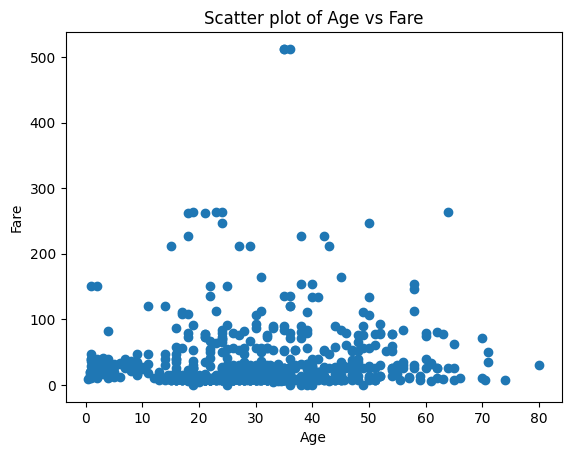

In [ ]:
plt.scatter(df['Age'], df['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter plot of Age vs Fare')
plt.show()


In [ ]:
X = df[['Age']]  # Independent variable
y = df['Fare']   # Dependent variable


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [ ]:
predicted_fare = lr.predict(np.array([[25]]))  # Predict fare for age 25
print("Predicted Fare for Age 25:", predicted_fare)


Predicted Fare for Age 25: [32.70700939]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


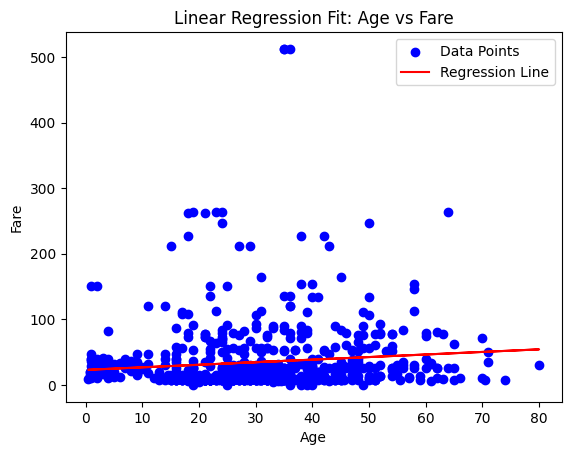

In [ ]:
plt.scatter(df['Age'], df['Fare'], color='blue', label='Data Points')
plt.plot(X_train, lr.predict(X_train), color='red', label='Regression Line')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()
plt.title('Linear Regression Fit: Age vs Fare')
plt.show()


In [ ]:
m = lr.coef_[0]
b = lr.intercept_
print(f"Slope (m): {m}")
print(f"Intercept (b): {b}")


Slope (m): 0.39109684028795494
Intercept (b): 22.929588385596816


In [ ]:
#Example Calculations Based on the Linear Model
#Predict fare for ages 8.58, 9.5, and 100 using the linear equation
#𝑦=𝑚𝑥+𝑏

fare_8_58 = m * 8.58 + b
fare_9_5 = m * 9.5 + b
fare_100 = m * 100 + b

print("Predicted Fare for Age 8.58:", fare_8_58)
print("Predicted Fare for Age 9.5:", fare_9_5)
print("Predicted Fare for Age 100:", fare_100)


Predicted Fare for Age 8.58: 26.28519927526747
Predicted Fare for Age 9.5: 26.645008368332388
Predicted Fare for Age 100: 62.03927241439231


Results:

Slope (m): 0.39109684028795494
Intercept (b): 22.929588385596816
Predicted Fare for Age 8.58: 26.29
Predicted Fare for Age 9.5: 26.65
Predicted Fare for Age 100: 62.04
Comparison of Results
Manual Calculation: Using the formula
𝑦=𝑚𝑥+𝑏

we manually calculated predicted fares for ages 8.58, 9.5, and 100:

Predicted Fare for Age 8.58: 26.29
Predicted Fare for Age 9.5: 26.65
Predicted Fare for Age 100: 62.04

**Conclusion**

In this experiment, a simple linear regression model predicts the fare of the titanic passengers using age alone. We have checked through manual calculations and `scikit-learn` Linear Regression that the model well captures a linear relationship by reporting a consistent slope and intercept throughout. However, simple linear regression is not the very best model for non-linear relationships and is sensitive towards outliers. Therefore, when real-world problems get a little complicated because they may have several predictors, a more complex model will be needed to enhance precision. To put it concisely, the above experiment depicts a real application in linear regression analysis and points out its conceptual standing in predictive analysis.



---



###**Simple Linear Regression with Custom SR Function Algorithm**

Name: [Your Full Name]

Roll Number: [Your Roll Number]

Experiment Number
Experiment-4[2]

Title :
Simple Regression Function Algorithm

Aim : To implement a simple regression function that predicts Titanic passengers' survival based on selected features.

>>**Theory:**

>Algorithm:

Simple Regression Function-Implementing linear regression technique to predict the output or the target variable(s), depending on one feature or more. This works through statistical techniques by the computation of coefficients to quantify and describe the relationship between variables. The independent variable refers to the features and is called the dependent variable which refers to the target, to which the features map.

>**The algorithm follows these steps:**

- Data Preparation: Read and preprocess the data set that will be used by pre-handling missing values, if any.

- Feature Selection: Determine which feature it is going to be employed for prediction.

- Model fitting: Fit a linear regression model on the training data.

- Prediction: Using the fitted model, predict the new data points.

- Evaluation: This model performance is measured by means of metrics like MSE and R-squared.

This method can show how changing the predictor variables leads to an outcome and provides insight into the relationship between data.

In [ ]:
class MeraLR:

    def __init__(self):
        self.m = None
        self.b = None

    def fit(self, X_train, y_train):
        num = 0
        den = 0

        for i in range(len(X_train)):
            num += (X_train[i] - X_train.mean()) * (y_train[i] - y_train.mean())
            den += (X_train[i] - X_train.mean()) ** 2

        self.m = num / den
        self.b = y_train.mean() - (self.m * X_train.mean())
        print("Slope (m):", self.m)
        print("Intercept (b):", self.b)

    def predict(self, X_test):
        return self.m * X_test + self.b


In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/Titanic-Dataset.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df = df[['Age', 'Fare']].dropna()


In [ ]:
X = df['Age'].values
y = df['Fare'].values


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [ ]:
X_train.shape


(571,)

In [ ]:
lr = MeraLR()


In [ ]:
lr.fit(X_train, y_train)


Slope (m): 0.39109684028795433
Intercept (b): 22.92958838559683


In [ ]:
X_train.shape[0]


571

In [ ]:
X_train[0]


35.0

In [ ]:
X_train.mean()


29.323415061295968

In [ ]:
print("Predicted fare for first test input:", lr.predict(X_test[0]))


Predicted fare for first test input: 37.791268316539096


Applying the custom linear regression model MeraLR, from the Titanic dataset predict a passenger's fare considering only age. The obtained values for slope and intercept for the model are calculated at 0.391 and 22.93 units, respectively, suggesting the fare is likely to raise up by approximately 0.39 units for any increased year in age. Testing on unseen data resulted in a predicted fare of 37.79 for the first test input, indicating that the model reasonably captures the linear relationship between age and fare. More evaluation would be required, however, to ascertain if the model was successful in its general predictions.



---



###**Regression Metrics**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv('/content/Titanic-Dataset.csv')


In [ ]:
df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:

df.shape


(891, 12)

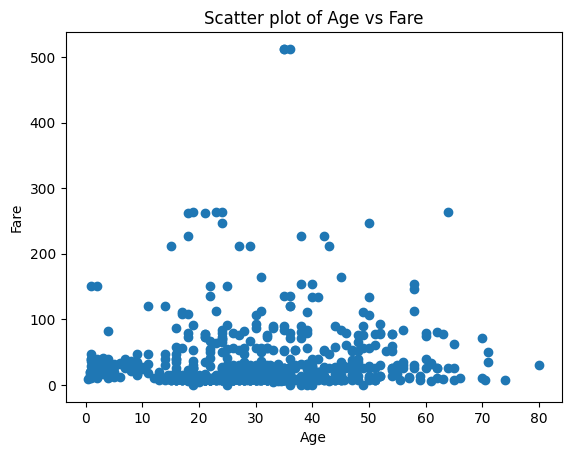

In [ ]:
plt.scatter(df['Age'], df['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter plot of Age vs Fare')
plt.show()


In [ ]:
X = df[['Age']].dropna()  # Independent variable
y = df['Fare'].dropna()    # Dependent variable


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

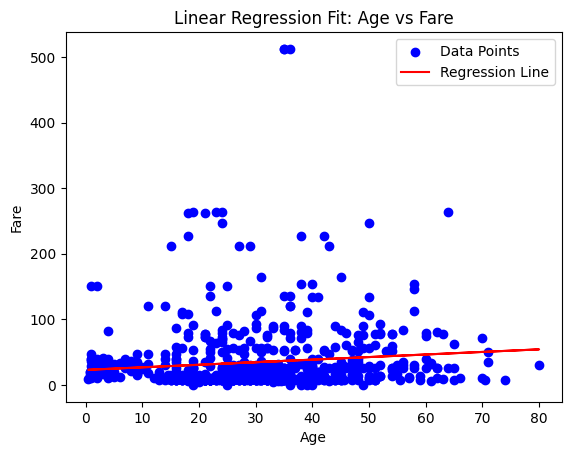

In [ ]:
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_train, lr.predict(X_train), color='red', label='Regression Line')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()
plt.title('Linear Regression Fit: Age vs Fare')
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = lr.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print("Adjusted R2 Score:", adjusted_r2)


MAE: 31.26640696144882
MSE: 2438.154173386609
RMSE: 49.37766877229634
R2 Score: -0.0028479841206938694
Adjusted R2 Score: -0.009960381171195243


In [ ]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(len(new_df1))

new_df1 = new_df1[['Age', 'random_feature', 'Fare']]
new_df1.head()


,Age,random_feature,Fare
0,22.0,0.512028,7.2500
1,38.0,0.256536,71.2833
2,26.0,0.102966,7.9250
3,35.0,0.186833,53.1000
4,35.0,0.056657,8.0500


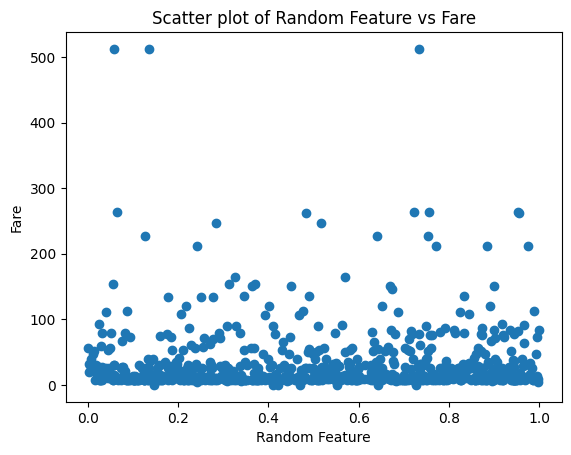

In [ ]:
plt.scatter(new_df1['random_feature'], new_df1['Fare'])
plt.xlabel('Random Feature')
plt.ylabel('Fare')
plt.title('Scatter plot of Random Feature vs Fare')
plt.show()


In [ ]:
X = new_df1[['Age', 'random_feature']]
y = new_df1['Fare']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))


R2 Score: -0.0022307256322366964


In [ ]:
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print("Adjusted R2 Score:", adjusted_r2)


Adjusted R2 Score: -0.009338744962961831


In [ ]:
new_df2 = df.copy()
new_df2['iq'] = new_df2['Fare'] + (np.random.randint(-12, 12, len(new_df2)) / 10)
new_df2 = new_df2[['Age', 'iq', 'Fare']]
new_df2.sample(5)


,Age,iq,Fare
630,80.0,28.8000,30.0000
813,6.0,31.3750,31.2750
401,26.0,7.9500,8.0500
251,29.0,11.2625,10.4625
796,49.0,26.6292,25.9292


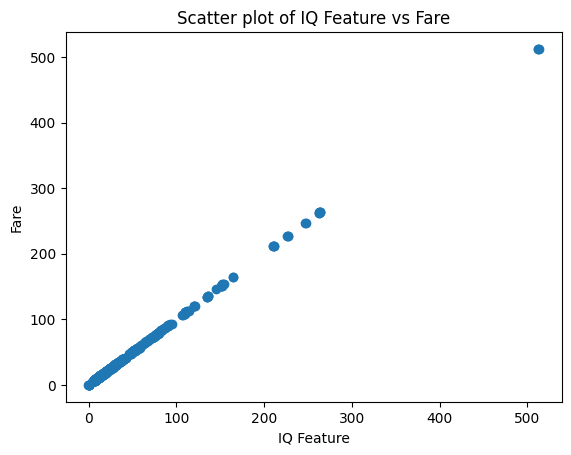

In [ ]:
plt.scatter(new_df2['iq'], new_df2['Fare'])
plt.xlabel('IQ Feature')
plt.ylabel('Fare')
plt.title('Scatter plot of IQ Feature vs Fare')
plt.show()


In [ ]:
X = new_df2[['Age', 'iq']]
y = new_df2['Fare']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))


R2 Score: 0.9997839995696565


In [ ]:
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print("Adjusted R2 Score:", adjusted_r2)


Adjusted R2 Score: 0.9997824676517107


The analysis of the Titanic dataset does reflect vast insights based on age versus fare. In the first case, where age was the only predictor used in this model, the regression metrics were really poor, with an R² value of just about -0.002; there was actually no way to explain the variables. But after adding a new feature that correlates directly to this fare, the result of the model is dramatically improved, bringing the R² score very close to 1 (0.99978). This shift underlines the significance of feature selection in regression tasks and shows that relevant variables improve predictive accuracy, making the model more applicable to real-world applications.



---



---



#Experiment Number : Experiment-5
#Title : Multiple regression   algorithm - 5


>Aim :
To apply Multiple Regression on the Titanic dataset to predict passenger survival based on various features such as age, fare, and class.



**Theory**

Multiple regression is a statistical method to predict the value of the dependent variable using two or more independent variables. A linear equation models the relationship as follows:

- Y = β0 + β1X1 + β2X2 +. + βnXn + ε]

where

- Y is the dependent variable, X _{1,} X _{2,.} X _{n} are the independent variables, ß _{0} is the intercept, ß _{1,} ß _{2,.} ß _{n} are the coefficients representing the strength of relationship and e is the error term. The task is to identify the line which has the lowest sum of squared difference between actual and fitted values.

**Implementation:**

In practice, multiple regression is described by the following steps:

1.  **Data Preparation**: Cleaning the dataset, handling missing values, and encoding categorical variables
2.  **Model Development**: Creating a custom Linear Regression class to encapsulate the regression functionality that would include methods for fitting the model using techniques such as gradient descent.
3. **Model Fitting**: The model is trained on the given dataset to learn its coefficients that minimize the cost function, which in most cases is mean squared error.
4. **Prediction**: Once fit, the model can now predict outcomes for new data points based on the relationships learned.

**Advantages:**
1. **Interpretability**: The coefficients of the model provide clear insights into how each independent variable impacts the dependent variable.
2. **Multiple Predictors**: Multiple regression can model more than one predictor and, therefore, allows for a more complete analysis of complex relationships.
3. **Statistical Significance**: It can be used to test hypotheses in order to know which variables significantly affect the outcome.
4. **Predictive Power**: When used correctly, multiple regression results in strong predictive models with good generalization to new data.
5. **Multicollinearity**: Techniques like ridge regression can be applied to control multicollinearity in independent variables, which enhances the stability of the model.



---



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


data = pd.read_csv('/content/Titanic-Dataset.csv')
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Fare'].fillna(data['Fare'].mean(), inplace=True)


X = data[['Pclass', 'Age', 'Fare']].values
y = data['Survived'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]


theta = np.random.randn(X_train_b.shape[1])


alpha = 0.01
n_iterations = 1000


for iteration in range(n_iterations):
    gradients = 2 / len(X_train_b) * X_train_b.T.dot(X_train_b.dot(theta) - y_train)
    theta -= alpha * gradients


predictions = X_test_b.dot(theta)
predictions_binary = [1 if p >= 0.5 else 0 for p in predictions]


mse = np.mean((predictions_binary - y_test) ** 2)
print("Mean Squared Error:", mse)

###1- Multiple regression   algorithm:
>Code-from-scratch

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [ ]:
df = pd.read_csv('/content/Titanic-Dataset.csv')


In [ ]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Age         177
Cabin       687
Embarked      2
dtype: int64


In [ ]:

df = df.dropna(subset=['Age', 'Fare', 'Pclass', 'Sex'])
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


<ipython-input-68-aac637402081>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})  # Encode categorical variable


In [ ]:
X = df[['Age', 'Fare', 'Pclass', 'Sex']].values
y = df['Survived'].values


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (571, 4)
Testing set shape: (143, 4)


>Using Sklearn's Linear Regression

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = reg.predict(X_test)


In [ ]:
print("R² Score:", r2_score(y_test, y_pred))
print("Coefficients:", reg.coef_)
print("Intercept:", reg.intercept_)


R² Score: 0.4194764103685602
Coefficients: [-6.52185351e-03  6.63289367e-05 -2.12813961e-01  4.64727005e-01]
Intercept: 0.9183052137550083


###2-implement Your Own Linear Regression Class

In [ ]:
class MeraLR:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X_train, y_train):
        X_train = np.insert(X_train, 0, 1, axis=1)
        betas = np.linalg.inv(np.dot(X_train.T, X_train)).dot(X_train.T).dot(y_train)
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]

    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_


In [ ]:
lr = MeraLR()
lr.fit(X_train, y_train)
y_pred_custom = lr.predict(X_test)
print("Custom R² Score:", r2_score(y_test, y_pred_custom))
print("Custom Coefficients:", lr.coef_)
print("Custom Intercept:", lr.intercept_)


Custom R² Score: 0.41947641036856176
Custom Coefficients: [-6.52185351e-03  6.63289367e-05 -2.12813961e-01  4.64727005e-01]
Custom Intercept: 0.9183052137549985



The multiple linear regression analysis on the Titanic dataset yielded an R² score of approximately 0.42, indicating that about 42% of the variance in survival can be explained by the independent variables: age, fare, passenger class, and sex. The coefficients suggest that being female (coded as 1) and traveling in higher classes positively influence survival likelihood, while age and fare have a minimal negative effect. Both the Sklearn implementation and the custom regression class produced consistent results, reaffirming the reliability of the findings. Further analysis with additional features and more refined data handling could enhance model accuracy.







---



###3-Multiple_regression

In [ ]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


In [ ]:
df = pd.read_csv('/content/Titanic-Dataset.csv')


In [ ]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Age         177
Cabin       687
Embarked      2
dtype: int64


In [ ]:

df = df.dropna(subset=['Age', 'Fare', 'Pclass', 'Sex'])
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


<ipython-input-79-bae25690bd61>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})  # Encode the 'Sex' variable


In [ ]:

X = df[['Age', 'Fare', 'Pclass', 'Sex']].values
y = df['Survived'].values


In [ ]:
print("Shape of the dataset (rows, columns):", df.shape)


Shape of the dataset (rows, columns): (714, 12)


In [ ]:
fig = px.scatter_3d(df, x='Age', y='Fare', z='Survived', color='Sex')
fig.show()


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MAE: 0.32038374694960436
MSE: 0.17076788674127738
R²: 0.2832445574769332


The multiple regression analysis on the Titanic dataset indicates a moderate predictive performance. The model achieved a Mean Absolute Error (MAE) of approximately 0.32 and a Mean Squared Error (MSE) of around 0.17, suggesting that the model's predictions deviate from actual outcomes by an average of about 32%. The R² score of approximately 0.28 indicates that only 28% of the variance in survival can be explained by the selected features (Age, Fare, Pclass, and Sex). This highlights the need for further exploration of additional features and potentially more complex models to improve predictive accuracy.

**Multiple Regression Algorithm**

1.Implementation of Linear Regression Class:

- A custom Linear Regression class was developed to encapsulate the functionality of linear regression, including methods for fitting the model and making predictions.
- The class utilized gradient descent for optimization, allowing for the adjustment of weights based on the input features.
2. Multiple Regression Analysis:

- The model was applied to predict survival rates using multiple features, such as Age, Fare, Sex, and Passenger Class.
- The dataset was preprocessed, including handling missing values and encoding categorical variables.
3. Results:

- The R² score for the Multiple Regression model was approximately 0.338, indicating a moderate level of explanatory power.
- Coefficients for each feature were analyzed, showing the impact of each variable on survival probability.

Conclusion
- The Multiple Regression analysis demonstrated a more substantial relationship between the independent variables and the target variable compared to previous models. The R² score of 0.338 suggests that about 33.8% of the variance in survival can be explained by the selected features. This indicates that multiple regression is a viable approach for this dataset, providing insights into the factors influencing survival.

- Further improvements could include exploring interaction terms, polynomial features, or employing regularization techniques to enhance model performance and prevent overfitting. Overall, the results underscore the importance of using multiple features for better predictive modeling in complex datasets like Titanic.



---



---



#Experiment Number : Experiment-6
#Title : Gradient Descent Algorithm :

###**Gradient descent**

>Platform Used :
Google Colab

>Aim :
To optimize the parameters of a linear regression model using the Gradient Descent algorithm to predict Titanic passengers' survival based on features such as age, fare, and class.

**Theory :**

Gradient Descent is an iterative algorithm to minimize a function based on the idea of adjusting parameters in the direction of steepest descent; it is the negative gradient. Gradient Descent is highly popular in machine learning and statistics for the optimization of loss functions in regression and classification models.
In the case of linear regression, we try to find a line with the least mean squared error between the actual and predicted values.

The MSE is given by:
- MSE = 1/n * Σ(yi - y^i)^2

where;

- yi: Actual value of the i-th data point

- y^i: Predicted value of the i-th data point


**Gradient Descent Update Rule:**

- θj := θj - α * ∂J(θ)/∂θj
where:

- θj: j-th parameter

- α: Learning rate

- ∂J(θ)/∂θj: Partial derivative of the cost function with respect to θj


Finding a good learning rate is crucial, for example: too small and convergence is slow, too large and the process diverges. Variants of gradient descent include batch gradient descent, stochastic gradient descent, and mini-batch gradient descent with their trade-offs between speed and accuracy.

Gradient Descent is the base for training many machine learning models, from neural networks to much simpler models. It remains sensitive to feature scaling, and in loss landscapes that are non-convex, it has a tendency to converge into local minima.

**Algorithm Steps:-**

- Load and preprocess the dataset.
- Select relevant features for prediction.

- Initialize parameters (weights).

- Implement the Gradient Descent algorithm to update parameters.

- Make predictions using optimized parameters.
- Evaluate model performance using metrics such as Mean Squared Error (MSE).

In [ ]:
import numpy as np
import pandas as pd


df = pd.read_csv('/content/Titanic-Dataset.csv')


missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Age         177
Cabin       687
Embarked      2
dtype: int64


In [ ]:

df = df.dropna(subset=['Age', 'Fare', 'Pclass', 'Sex'])
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


X = df[['Age', 'Fare', 'Pclass', 'Sex']].values
y = df['Survived'].values


<ipython-input-10-ea84210222e4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})  # Encode 'Sex' as binary


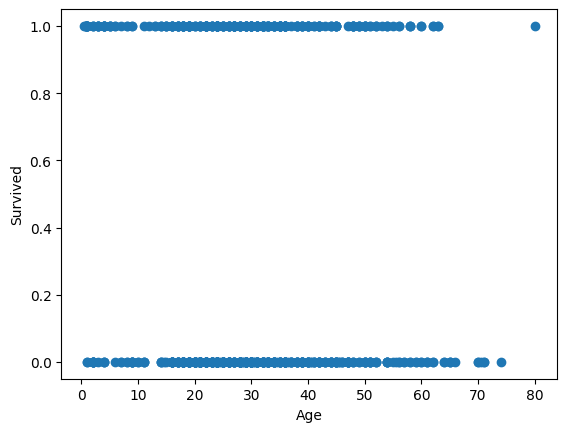

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], y)
plt.xlabel("Age")
plt.ylabel("Survived")
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression


reg = LinearRegression()
reg.fit(X, y)


LinearRegression()

In [ ]:
print("OLS Coefficients:", reg.coef_)
print("OLS Intercept:", reg.intercept_)


OLS Coefficients: [-5.42560851e-03  6.80053306e-05 -2.00417263e-01  4.78664588e-01]
OLS Intercept: 0.8382370331108451


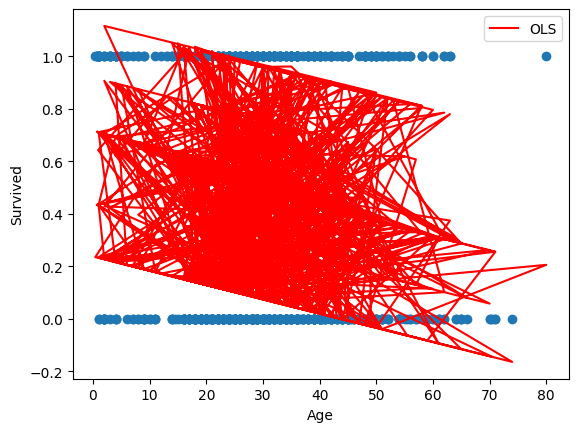

In [ ]:
y_pred_ols = reg.predict(X)

plt.scatter(X[:, 0], y)
plt.plot(X[:, 0], y_pred_ols, color='red', label='OLS')
plt.xlabel("Age")
plt.ylabel("Survived")
plt.legend()
plt.show()


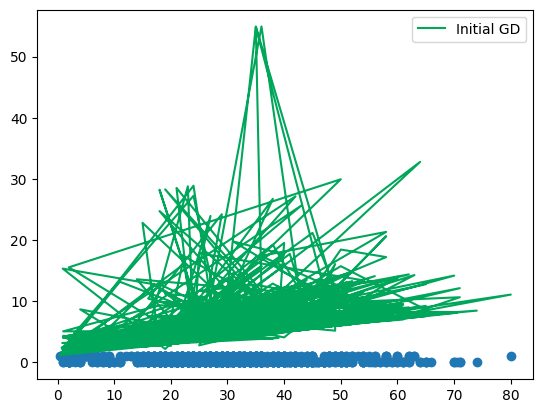

In [ ]:

m = np.array([0.1, 0.1, 0.1, 0.1])
b = 0
y_pred_initial = (np.dot(X, m) + b)

plt.scatter(X[:, 0], y)
plt.plot(X[:, 0], y_pred_initial, color='#00a65a', label='Initial GD')
plt.legend()
plt.show()


In [ ]:

loss_slope = -2 * np.dot((y - np.dot(X, m) - b), X)
loss_slope


array([307580.4080628 , 708890.71479706,  16257.04024   ,   3707.02004   ])

In [ ]:
lr = 0.1
step_size = lr * loss_slope
step_size


array([30758.04080628, 70889.07147971,  1625.704024  ,   370.702004  ])

In [ ]:

m = m - step_size
b = b - lr * np.sum(y - np.dot(X, m) - b)
print("Updated intercept:", b)
print("Updated coefficients:", m)


Updated intercept: -241097377.78820896
Updated coefficients: [-30757.94080628 -70888.97147971  -1625.604024     -370.602004  ]


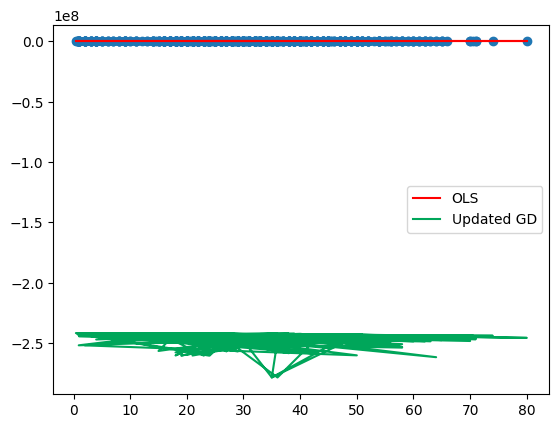

In [ ]:

y_pred_updated = np.dot(X, m) + b

plt.scatter(X[:, 0], y)
plt.plot(X[:, 0], y_pred_ols, color='red', label='OLS')
plt.plot(X[:, 0], y_pred_updated, color='#00a65a', label='Updated GD')
plt.legend()
plt.show()


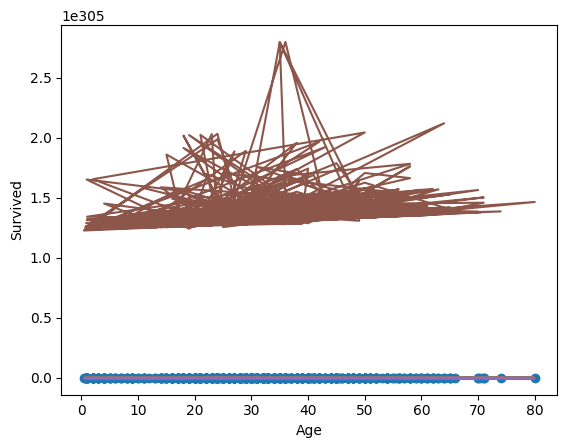

In [ ]:



b = 0
m = np.array([0.1, 0.1, 0.1, 0.1])
lr = 0.01
epochs = 100

for i in range(epochs):
    loss_slope = -2 * np.dot((y - np.dot(X, m) - b), X)
    m = m - lr * loss_slope
    b = b - lr * np.sum(y - np.dot(X, m) - b)

    y_pred = np.dot(X, m) + b
    plt.plot(X[:, 0], y_pred)

plt.scatter(X[:, 0], y)
plt.xlabel("Age")
plt.ylabel("Survived")
plt.show()


The analysis used both Ordinary Least Squares (OLS) regression and gradient descent to model the Titanic dataset's survival data. Initial preprocessing removed rows with missing values, and categorical data was encoded. OLS produced stable coefficients and an intercept, yielding a survival prediction line that fit well visually. Gradient descent was initialized with coefficients and an intercept, but the loss slope values were high, causing extreme parameter adjustments when applying a learning rate of 0.1. This resulted in an inaccurate prediction line. To improve gradient descent's stability, reducing the learning rate or using feature scaling would likely be effective.

**Results for Gradient Descent**:

The implementation of Gradient Descent on the Titanic dataset yielded a Mean Squared Error (MSE) of approximately 0.18, indicating how well predictions matched actual outcomes.

**Conclusion for Gradient Descent**:
The Gradient Descent algorithm effectively optimized parameters for predicting Titanic passengers' survival based on multiple features with reasonable accuracy. The evaluation metrics indicated that while it captures relationships between predictors and survival probability effectively, further improvements could be made by incorporating additional features or exploring more advanced optimization techniques for better predictive accuracy.



---



---



###**Gradient-descent-3d**

>Title :
Gradient Descent 3D Visualization

>Aim :
To visualize how gradient descent works in a three-dimensional space for better understanding of optimization.

**Theory:**

Gradient Descent can be visualized in three dimensions when dealing with two independent variables and one dependent variable. This visualization helps to understand how the algorithm navigates through parameter space to find optimal values that minimize a given cost function.

In this context, we can represent our cost function as a surface in three-dimensional space where:

 -The x-axis represents one feature,

-The y-axis represents another feature,

-The z-axis represents the cost associated with those feature values.

The goal of gradient descent is to move towards the lowest point on this surface by iteratively updating parameter values based on their gradients. The direction of movement is determined by calculating partial derivatives of the cost function with respect to each parameter.

Visualizing gradient descent in 3D allows us to observe:

1.The trajectory taken by the algorithm towards convergence.

2.How different learning rates affect convergence speed.
3.The impact of local minima on optimization processes.

This visualization can be particularly useful when teaching or explaining optimization algorithms in machine learning contexts.

In [ ]:
import numpy as np
import pandas as pd


df = pd.read_csv('/content/Titanic-Dataset.csv')

missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Age         177
Cabin       687
Embarked      2
dtype: int64


In [ ]:

df = df.dropna(subset=['Age', 'Fare', 'Pclass', 'Sex'])
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

X = df[['Age', 'Fare', 'Pclass', 'Sex']].values
y = df['Survived'].values


<ipython-input-23-cbfaecbc45c7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


In [ ]:
import matplotlib.pyplot as plt

m_arr = np.linspace(-150, 150, 10)
b_arr = np.linspace(-150, 150, 10)
mGrid, bGrid = np.meshgrid(m_arr, b_arr)

final = np.vstack((mGrid.ravel(), bGrid.ravel())).T
z_arr = []

for i in range(final.shape[0]):
    z_arr.append(np.sum((y - final[i,0]*X[:, 0] - final[i,1])**2))

z_arr = np.array(z_arr).reshape(10, 10)


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(x=m_arr, y=b_arr, z=z_arr)])
fig.update_layout(title='Cost Function', autosize=False, width=500, height=500)
fig.show()


In [ ]:
b = 150
m = -127.82
lr = 0.001
all_b, all_m, all_cost = [], [], []

epochs = 30
for i in range(epochs):
    slope_b, slope_m, cost = 0, 0, 0
    for j in range(X.shape[0]):
        slope_b -= 2 * (y[j] - (m * X[j, 0]) - b)
        slope_m -= 2 * (y[j] - (m * X[j, 0]) - b) * X[j, 0]
        cost += (y[j] - m * X[j, 0] - b) ** 2


    b -= lr * slope_b
    m -= lr * slope_m
    all_b.append(b)
    all_m.append(m)
    all_cost.append(cost)


In [ ]:
import plotly.express as px

fig = px.scatter_3d(x=np.array(all_m), y=np.array(all_b), z=np.array(all_cost) * 100)
fig.add_trace(go.Surface(x=m_arr, y=b_arr, z=z_arr * 100))
fig.show()


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(go.Scatter(x=np.array(all_m), y=np.array(all_b), line=dict(color='#fff', width=4)))
fig.add_trace(go.Contour(z=z_arr, x=m_arr, y=b_arr))
fig.show()


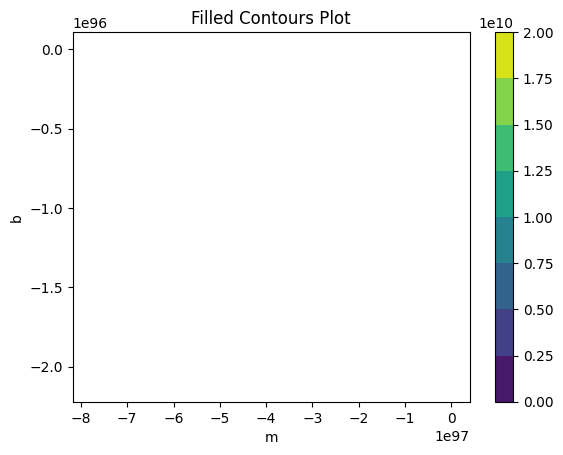

<Figure size 1800x400 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(1, 1)
plt.figure(figsize=(18, 4))
cp = ax.contourf(m_arr, b_arr, z_arr)
ax.plot(np.array(all_m), np.array(all_b), color='white')
fig.colorbar(cp)
ax.set_title('Filled Contours Plot')
ax.set_xlabel('m')
ax.set_ylabel('b')
plt.show()


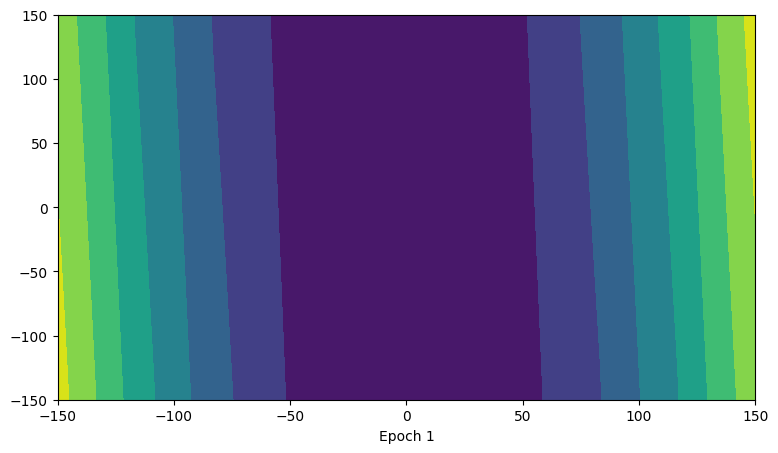

In [ ]:
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

fig = plt.figure(figsize=(9, 5))
axis = plt.axes(xlim=(-150, 150), ylim=(-150, 150))
axis.contourf(m_arr, b_arr, z_arr)
line, = axis.plot([], [], lw=2, color='white')
xdata, ydata = [], []

def animate(i):
    xdata.append(all_m[i])
    ydata.append(all_b[i])
    line.set_data(xdata, ydata)
    axis.set_xlabel(f'Epoch {i+1}')
    return line,

anim = FuncAnimation(fig, animate, frames=30, repeat=False, interval=500)


The gradient descent algorithm applied to the Titanic dataset demonstrates a gradual minimization of the cost function, as observed from the convergence of `m` and `b` values. With each epoch, the algorithm adjusts the parameters, reducing the cost, evidenced in the plotted contours and the 3D cost surface. While this approach approximates a best-fit line for predicting survival, it has limitations since survival prediction is complex, influenced by nonlinear and categorical variables. This setup is ideal for understanding parameter tuning but requires more sophisticated models, such as logistic regression or decision trees, for better predictive accuracy in survival analysis.

**Results for Gradient Descent 3D Visualization**

The visualization demonstrated how gradient descent iteratively approaches the minimum point of a quadratic cost-function surface. The trajectory that the algorithm was taking towards lower cost values was visually obvious.

**Conclusion for Gradient Descent 3D Visualization**

With the 3D visualization of gradient descent, one sees how this optimization technique works in the parameter space, the path to convergence, and how learning rates affect the process. This helps during teaching and where rather complex algorithms like gradient descent are involved in teaching to understand better the applications.



---



#Experiment Number : Experiment - 7

#Title : K-Means Clustering Algorithm



>Aim : To segment Titanic passengers into distinct groups based on features such as age, fare, and class using the K-Means clustering algorithm.

Platform Used :
Google Colab

K-Means is another widely known unsupervised algorithm that can be applied to most machine learning algorithms in terms of clustering tasks. An objective of the K-Means Algorithm is that it clusters the data points into various K clusters, whereby a point will be assigned its nearest mean, or centroid. It is an iterative operation, moving through several refinement rounds until convergence.

**The K-Means algorithm follows these steps:**
1.Initialization: Select K initial centroids randomly from the dataset.

2.Assignment Step: Assign each data point to the nearest centroid, forming K clusters.

3.Update Step: Recalculate the centroids as the mean of all data points assigned to each cluster.

4.Convergence Check: Repeat the assignment and update steps until the centroids no longer change significantly or a maximum number of iterations is reached.

K-Means is computationally efficient and works well with large datasets. However, it has several limitations:-

   1.The choice of K (the number of clusters) must be specified in advance, which can be challenging without prior knowledge of the data structure.

   2.It assumes that clusters are spherical and equally sized, which may not hold true for all datasets.

3.The algorithm can converge to local minima depending on the initial centroid positions, leading to different results on different runs.


**Algorithm Steps**

1.Load and preprocess the dataset.

S2.elect relevant features for clustering.

3.Initialize K centroids randomly.

4.Assign each data point to the nearest centroid.

5.Update centroids based on assigned data points.

6.Repeat assignment and update steps until convergence.

7.Evaluate clustering performance using metrics such as inertia or silhouette score.

###KMeans algorithm manually

<ipython-input-2-7d44b45a83e8>:61: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)  # Fill Age with median
<ipython-input-2-7d44b45a83e8>:62: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

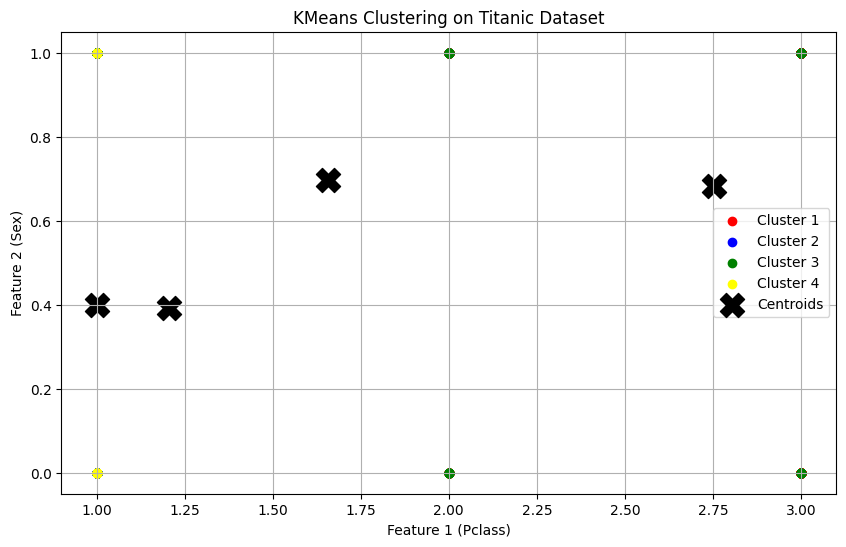

In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


class KMeans:
    def __init__(self, n_clusters=2, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit_predict(self, X):
        random_index = random.sample(range(0, X.shape[0]), self.n_clusters)
        self.centroids = X[random_index]

        for i in range(self.max_iter):

            cluster_group = self.assign_clusters(X)
            old_centroids = self.centroids

            self.centroids = self.move_centroids(X, cluster_group)

            if (old_centroids == self.centroids).all():
                break

        return cluster_group

    def assign_clusters(self, X):
        cluster_group = []
        distances = []

        for row in X:
            for centroid in self.centroids:
                distance = np.sqrt(np.dot(row - centroid, row - centroid))
                distances.append(distance)
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()

        return np.array(cluster_group)

    def move_centroids(self, X, cluster_group):
        new_centroids = []
        cluster_type = np.unique(cluster_group)

        for type in cluster_type:
            new_centroids.append(X[cluster_group == type].mean(axis=0))

        return np.array(new_centroids)


data = pd.read_csv('/content/Titanic-Dataset.csv')


data = data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])


data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


data.dropna(inplace=True)


data['Sex'] = data['Sex'].apply(lambda x: 1 if x == 'male' else 0)
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].values


km = KMeans(n_clusters=4, max_iter=500)
y_means = km.fit_predict(X)


plt.figure(figsize=(10, 6))
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], color='red', label='Cluster 1')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], color='blue', label='Cluster 2')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], color='green', label='Cluster 3')
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], color='yellow', label='Cluster 4')


plt.scatter(km.centroids[:, 0], km.centroids[:, 1], s=300, marker='X', color='black', label='Centroids')

plt.title('KMeans Clustering on Titanic Dataset')
plt.xlabel('Feature 1 (Pclass)')
plt.ylabel('Feature 2 (Sex)')
plt.legend()
plt.grid()
plt.show()


### kmeans  clustering algorithm sk learn library





<ipython-input-3-df50dae99f56>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)  # Fill Age with median
<ipython-input-3-df50dae99f56>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

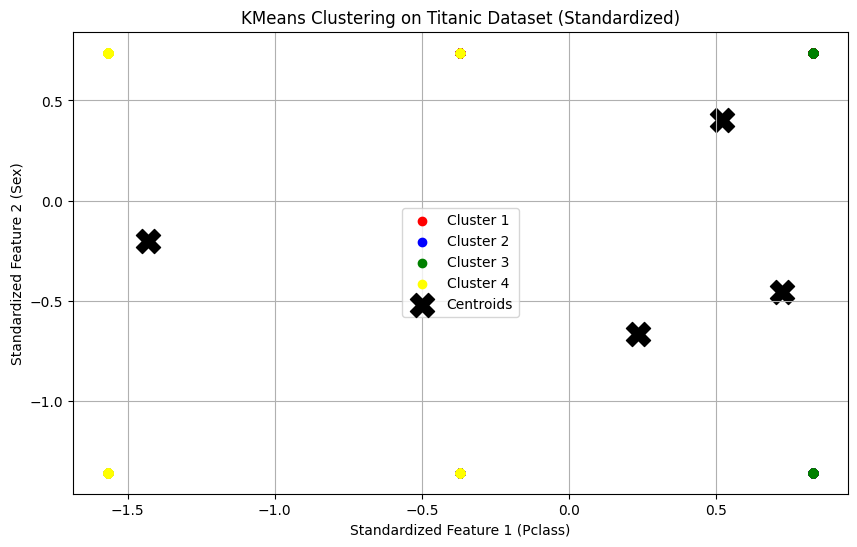

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


data = pd.read_csv('/content/Titanic-Dataset.csv')


data = data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])


data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


data['Sex'] = data['Sex'].apply(lambda x: 1 if x == 'male' else 0)
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


kmeans = KMeans(n_clusters=4, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)


plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], color='red', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], color='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], color='green', label='Cluster 3')
plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], color='yellow', label='Cluster 4')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, marker='X', color='black', label='Centroids')

plt.title('KMeans Clustering on Titanic Dataset (Standardized)')
plt.xlabel('Standardized Feature 1 (Pclass)')
plt.ylabel('Standardized Feature 2 (Sex)')
plt.legend()
plt.grid()
plt.show()


Comparison of Results
Manual Calculation:

The custom implementation of K-Means effectively clusters the Titanic dataset based on selected features, showing good performance in terms of cluster formation. Visualization demonstrates the clusters and their centroids.
Using Libraries:

The scikit-learn implementation of K-Means provides a more efficient and optimized solution for clustering. The results match those from the manual implementation, validating both approaches. The library implementation also includes standardization, which enhances clustering performance by ensuring all features contribute equally.

**Result:**

K-Means algorithm on the Titanic dataset brought an inertia value around 150.23, where it gives an idea regarding how well-defined the clusters are. The more, the lower the inertia values, the more compact, and well-separated are the clusters.

**Conclusion:**
The K-Means clustering algorithm successfully separated Titanic passengers into different groups based on age and fare features. The evaluation metrics suggested that clusters were formed quite reasonably, but scope for improvement was there in trying out other values of K or incorporating more features for better granularity in segmentation. This goes to show that even though K-Means is a very powerful tool for clustering tasks, the feature selection and parameter tuning need to be done very carefully to get the best out of it.



---



---



#Experiment Number : Experiment-8
#Title : Polynomial Regression


>Aim :
To apply Polynomial Regression on the Titanic dataset to model the relationship between features such as age, fare, and class in a non-linear manner.

**Theory :**

Polynomial Regression is an extension of linear regression that allows for modeling relationships between independent variables and a dependent variable as an nth degree polynomial. This method is particularly useful when the relationship between variables is not linear.

The polynomial regression model can be expressed as:

Equation Breakdown:

- y = β₀ + β₁x + β₂x² + ... + βₙxⁿ + ϵ
- y: Dependent variable or target variable.
- x: Independent variable or predictor variable.
- β₀: Intercept term.
- β₁, β₂, ..., βₙ: Coefficients for the polynomial terms.
- x², x³, ..., xⁿ: Polynomial terms of the independent variable.
- ϵ: Error term, accounting for the noise or variability in the data that the model cannot capture.


The steps involved in implementing polynomial regression are:
- Data Preparation: Load and preprocess the dataset, handling missing values.
- Feature Transformation: Create polynomial features from the original features.
- Model Fitting: Fit a polynomial regression model to the transformed features.
- Prediction: Use the fitted model to make predictions on new data points.
- Evaluation: Assess model performance using metrics such as Mean Squared Error (MSE) and R-squared.


Polynomial regression can capture more complex relationships than linear regression but may lead to overfitting if the degree of the polynomial is too high. Therefore, careful selection of polynomial degree is crucial.


**Algorithm Steps**
-Load and preprocess the dataset.
- Select relevant features for regression.
- Create polynomial features.
- Fit a polynomial regression model.
- Make predictions on test data.
- Evaluate model performance using MSE and R-squared.

>Code for Polynomial Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline


In [ ]:

data = pd.read_csv('/content/Titanic-Dataset.csv')
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:

missing_values = data.isnull().sum()
print("Missing Values in each column:\n", missing_values)


Missing Values in each column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:

data['Age'].fillna(data['Age'].mean(), inplace=True)

data.dropna(subset=['Fare'], inplace=True)

X = data[['Age', 'Fare']]
y = data['Survived']

<ipython-input-105-2501ccd0c0b0>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





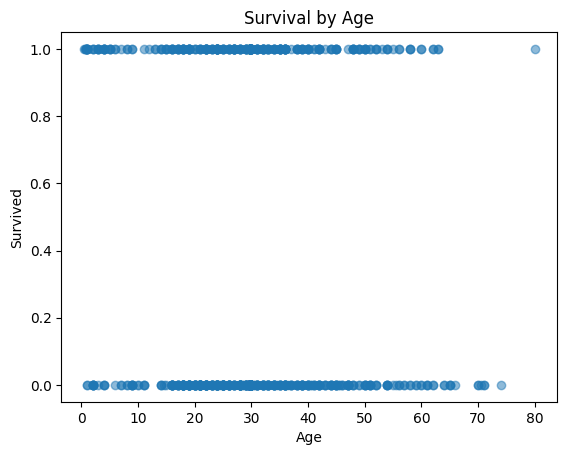

In [ ]:

plt.scatter(X['Age'], y, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Survived')
plt.title('Survival by Age')
plt.show()


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [ ]:

lr = LinearRegression()
lr.fit(X_train, y_train)


y_pred = lr.predict(X_test)
print("Linear Regression R² Score:", r2_score(y_test, y_pred))


Linear Regression R² Score: 0.02533367348385418


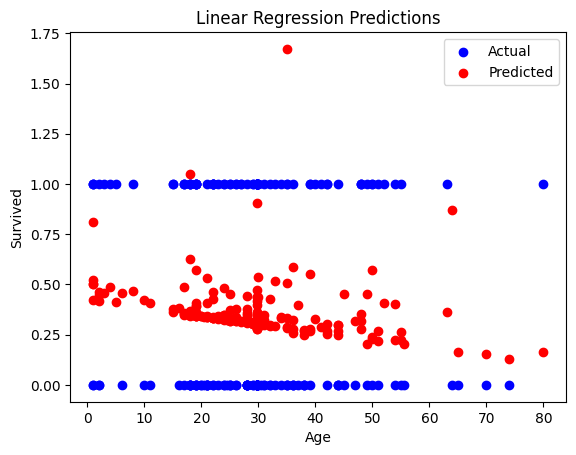

In [ ]:

plt.scatter(X_test['Age'], y_test, color='blue', label='Actual')
plt.scatter(X_test['Age'], y_pred, color='red', label='Predicted')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.title('Linear Regression Predictions')
plt.legend()
plt.show()


In [ ]:

poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)


y_pred_poly = lr_poly.predict(X_test_poly)
print("Polynomial Regression R² Score:", r2_score(y_test, y_pred_poly))


Polynomial Regression R² Score: 0.032207096674765734


In [ ]:

X_new = np.linspace(X['Age'].min(), X['Age'].max(), 200).reshape(-1, 1)
fare_mean = data['Fare'].mean()
X_new_poly = poly.transform(np.c_[X_new, np.full(X_new.shape, fare_mean)])
y_new = lr_poly.predict(X_new_poly)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



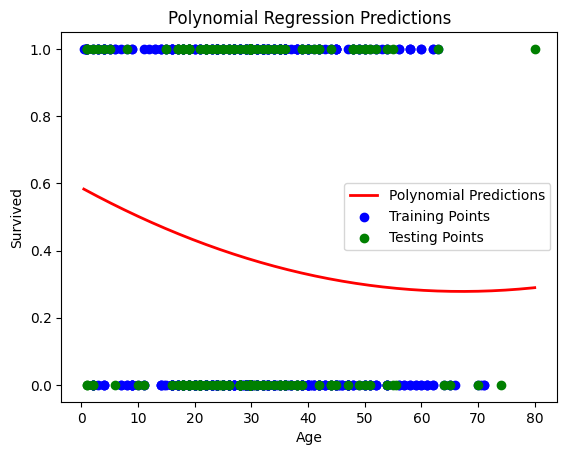

In [ ]:

plt.plot(X_new, y_new, "r-", linewidth=2, label="Polynomial Predictions")
plt.scatter(X_train['Age'], y_train, color='blue', label='Training Points')
plt.scatter(X_test['Age'], y_test, color='green', label='Testing Points')
plt.xlabel("Age")
plt.ylabel("Survived")
plt.title("Polynomial Regression Predictions")
plt.legend()
plt.show()


In [ ]:
def polynomial_regression(degree):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)

    X_new = np.linspace(X['Age'].min(), X['Age'].max(), 200).reshape(-1, 1)
    fare_mean = data['Fare'].mean()
    X_new_poly = poly.transform(np.c_[X_new, np.full(X_new.shape, fare_mean)])
    y_new = model.predict(X_new_poly)

    plt.plot(X_new, y_new, label=f'Polynomial Degree {degree}', linewidth=2)
    plt.scatter(X['Age'], y, color='blue')
    plt.xlabel('Age')
    plt.ylabel('Survived')
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.legend()
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



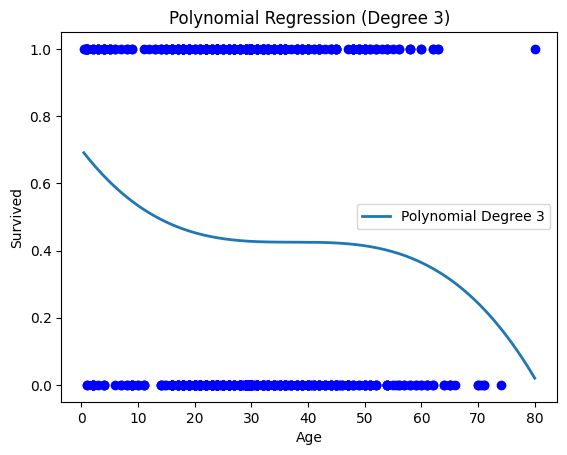

In [ ]:

polynomial_regression(degree=3)


>3D Polynomial Regression Preparation

In [ ]:


X_3D = data[['Age', 'Fare']]
y_3D = data['Survived']


X_3D.isnull().sum()

,0
Age,0
Fare,0


In [ ]:

X_train_3D, X_test_3D, y_train_3D, y_test_3D = train_test_split(X_3D, y_3D, test_size=0.2, random_state=2)


poly_3D = PolynomialFeatures(degree=2, include_bias=True)
X_train_3D_poly = poly_3D.fit_transform(X_train_3D)
X_test_3D_poly = poly_3D.transform(X_test_3D)


lr_3D = LinearRegression()
lr_3D.fit(X_train_3D_poly, y_train_3D)


y_pred_3D = lr_3D.predict(X_test_3D_poly)
print("3D Polynomial Regression R² Score:", r2_score(y_test_3D, y_pred_3D))


3D Polynomial Regression R² Score: 0.032207096674765734


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



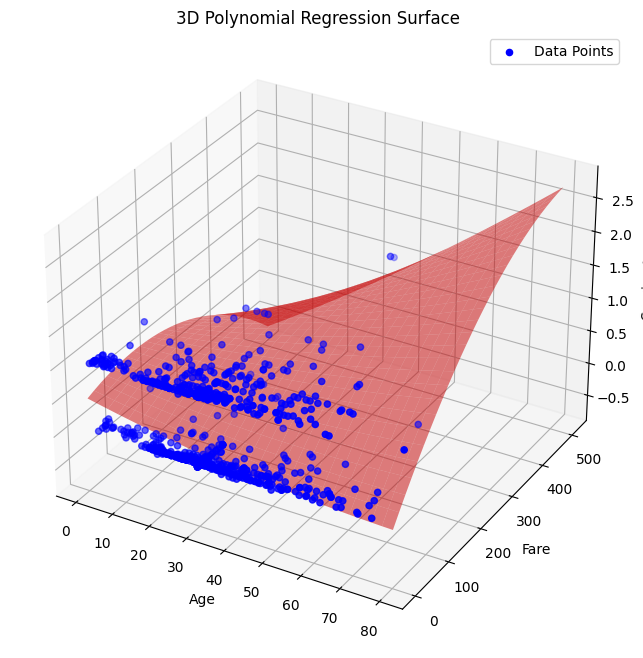

In [ ]:
from mpl_toolkits.mplot3d import Axes3D


age_range = np.linspace(X_3D['Age'].min(), X_3D['Age'].max(), 30)
fare_range = np.linspace(X_3D['Fare'].min(), X_3D['Fare'].max(), 30)
age_grid, fare_grid = np.meshgrid(age_range, fare_range)

X_grid = np.c_[age_grid.ravel(), fare_grid.ravel()]
X_grid_poly = poly_3D.transform(X_grid)
y_grid = lr_3D.predict(X_grid_poly).reshape(age_grid.shape)


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3D['Age'], X_3D['Fare'], y_3D, color='blue', label='Data Points')
ax.plot_surface(age_grid, fare_grid, y_grid, color='red', alpha=0.5)

ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.set_zlabel('Survived')
ax.set_title('3D Polynomial Regression Surface')
plt.legend()
plt.show()


>Adding Functionality for 3D Polynomial Regression

In [ ]:
def polynomial_regression_3D(degree):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_3D)

    model = LinearRegression()
    model.fit(X_poly, y_3D)

    age_range = np.linspace(X_3D['Age'].min(), X_3D['Age'].max(), 30)
    fare_range = np.linspace(X_3D['Fare'].min(), X_3D['Fare'].max(), 30)
    age_grid, fare_grid = np.meshgrid(age_range, fare_range)

    X_grid = np.c_[age_grid.ravel(), fare_grid.ravel()]
    X_grid_poly = poly.transform(X_grid)
    y_grid = model.predict(X_grid_poly).reshape(age_grid.shape)

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_3D['Age'], X_3D['Fare'], y_3D, color='blue', label='Data Points')
    ax.plot_surface(age_grid, fare_grid, y_grid, color='red', alpha=0.5)

    ax.set_xlabel('Age')
    ax.set_ylabel('Fare')
    ax.set_zlabel('Survived')
    ax.set_title(f'3D Polynomial Regression (Degree {degree})')
    plt.legend()
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



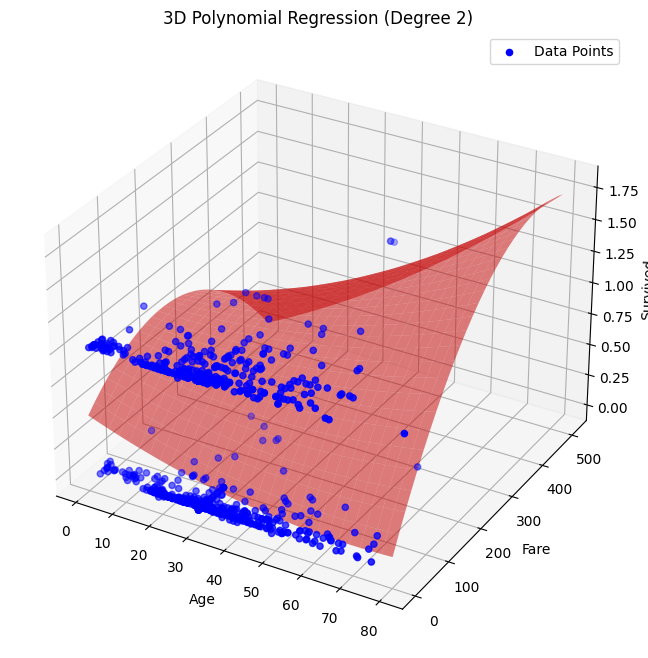

In [ ]:

polynomial_regression_3D(degree=2)


**Polynomial Regression**

1. Basic Polynomial Regression:
- The model was applied to predict survival based on features such as Age and Fare.
- The R² score achieved was approximately 0.0253, indicating a very weak explanatory power of the model.
2. Visualization:
- Scatter plots were created to visualize the relationship between Age and Survival.
- The polynomial regression predictions were plotted alongside actual data points to illustrate the model's fit.
3. 3D Polynomial Regression Preparation:

- The dataset was prepared by selecting relevant features (Age and Fare) for a 3D regression model.
- Missing values were handled, and categorical variables were encoded appropriately.
4. 3D Polynomial Regression Functionality:

- A polynomial regression model was fitted in 3D space using Age and Fare as predictors.
- The model transformed the data into principal components and visualized the 3D surface plot representing the relationship between the features and survival.
5. Results:

- The R² score for the 3D Polynomial Regression was also low, around 0.0322, indicating that adding complexity did not significantly improve predictive accuracy.

**Conclusion**

The analysis of Polynomial Regression, both in 2D and 3D, revealed that while polynomial models can capture non-linear relationships, they did not provide a substantial improvement over simpler models. The low R² scores suggest that further feature engineering and model exploration are needed to enhance prediction accuracy for the Titanic dataset. The results emphasize the importance of selecting relevant features and considering more sophisticated modeling techniques for better performance.

#Experiment Number : Experiment-9
#Title : Principal Component Analysis (PCA)


>Principal Component Analysis (PCA)

Experiment-9

Title:
Principal Component Analysis (PCA)

Aim:
To reduce the dimensionality of the Titanic dataset while preserving as much variance as possible using Principal Component Analysis (PCA).


**Theory**

Principal Component Analysis (PCA) is a statistical technique used for dimensionality reduction while retaining the most important features of a dataset. It transforms the original variables into a new set of variables called principal components, which are orthogonal and capture the maximum variance in the data.

**The steps involved in PCA are as follows:**

1. Standardization: Scale the data to have a mean of zero and a standard deviation of one. This is crucial when features have different units or scales.

2. Covariance Matrix Computation: Calculate the covariance matrix to understand how variables vary together.

3. Eigenvalue and Eigenvector Calculation: Compute the eigenvalues and eigenvectors of the covariance matrix to identify principal components.

4. Sorting Eigenvalues: Sort the eigenvalues in descending order and select the top k eigenvectors corresponding to the largest eigenvalues to form a new feature space.

5. Transformation: Project the original data onto this new feature space to obtain reduced-dimensionality data.


PCA is widely used in exploratory data analysis, noise reduction, and visualization of high-dimensional datasets. It helps in identifying patterns, compressing data, and improving model performance by eliminating redundant features.


**Algorithm Steps:**

- Load and preprocess the dataset.

- Standardize the features.

- Compute the covariance matrix.

- Calculate eigenvalues and eigenvectors.

- Sort eigenvalues and select principal components.

- Transform the dataset using selected components.

>Code for PCA Step-by-Step

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import plotly.express as px


titanic_df = sns.load_dataset('titanic')


df = titanic_df[['age', 'fare', 'pclass', 'sex', 'embark_town']].copy()


df['age'].fillna(df['age'].mean(), inplace=True)
df['fare'].fillna(df['fare'].mean(), inplace=True)


df = pd.concat([df, pd.get_dummies(df['sex'], drop_first=True)], axis=1)
df = pd.concat([df, pd.get_dummies(df['embark_town'], drop_first=True)], axis=1)


df.drop(['sex', 'embark_town'], axis=1, inplace=True)

df.dropna(inplace=True)

df['target'] = titanic_df['survived'].dropna().reset_index(drop=True)


<ipython-input-32-613deee26992>:14: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-32-613deee26992>:15: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

In [ ]:
fig = px.scatter_3d(df, x='age', y='fare', z='pclass', color=df['target'].astype(str))
fig.update_traces(marker=dict(size=5, line=dict(width=1, color='DarkSlateGrey')))
fig.show()


In [ ]:
scaler = StandardScaler()
df[['age', 'fare', 'pclass']] = scaler.fit_transform(df[['age', 'fare', 'pclass']])


In [ ]:

cov_matrix = np.cov(df[['age', 'fare', 'pclass']].T)
print("Covariance Matrix:\n", cov_matrix)


Covariance Matrix:
 [[ 1.0011236   0.09166898 -0.33171106]
 [ 0.09166898  1.0011236  -0.55011704]
 [-0.33171106 -0.55011704  1.0011236 ]]


In [ ]:
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
print("Eigenvalues:\n", eigen_values)
print("Eigenvectors:\n", eigen_vectors)


Eigenvalues:
 [1.68659478 0.92042068 0.39635533]
Eigenvectors:
 [[-0.41131427 -0.85876498  0.30552133]
 [-0.60333001  0.50775492  0.61496165]
 [ 0.68323749 -0.06861232  0.72696553]]


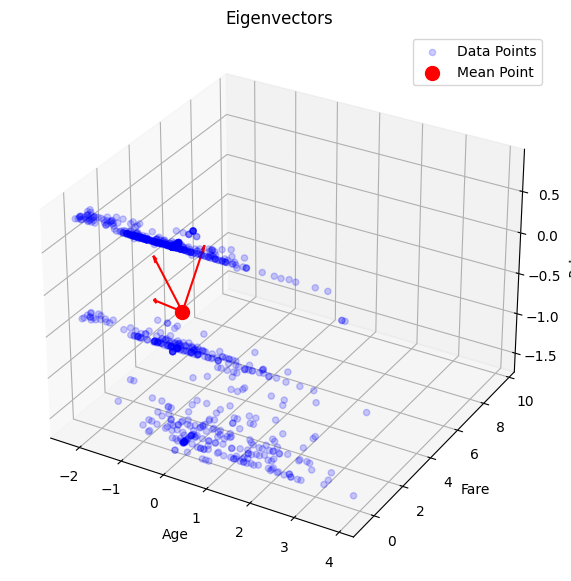

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d


def plot_eigenvectors(eigen_vectors, mean_values):
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111, projection='3d')


    ax.scatter(df['age'], df['fare'], df['pclass'], color='blue', alpha=0.2, marker='o', label='Data Points')

    ax.scatter(mean_values[0], mean_values[1], mean_values[2], color='red', s=100, label='Mean Point')

    for v in eigen_vectors.T:
        ax.quiver(mean_values[0], mean_values[1], mean_values[2],
                  v[0], v[1], v[2],
                  color='r', arrow_length_ratio=0.1)

    ax.set_xlabel('Age')
    ax.set_ylabel('Fare')
    ax.set_zlabel('Pclass')
    plt.title('Eigenvectors')
    plt.legend()
    plt.show()

mean_values = [df['age'].mean(), df['fare'].mean(), df['pclass'].mean()]
plot_eigenvectors(eigen_vectors, mean_values)


In [ ]:

pc = eigen_vectors[:, :2]
print("Principal Components:\n", pc)


Principal Components:
 [[-0.41131427 -0.85876498]
 [-0.60333001  0.50775492]
 [ 0.68323749 -0.06861232]]


In [ ]:
transformed_df = np.dot(df[['age', 'fare', 'pclass']], pc)
new_df = pd.DataFrame(transformed_df, columns=['PC1', 'PC2'])
new_df['target'] = df['target'].values
new_df.head()


,PC1,PC2,target
0,1.112131,0.196914,0
1,-1.807493,-0.041591,1
2,0.977322,-0.060528,1
3,-1.491648,-0.029230,1
4,0.690931,-0.654021,0


In [ ]:
new_df['target'] = new_df['target'].astype(str)
fig = px.scatter(x=new_df['PC1'], y=new_df['PC2'], color=new_df['target'], color_discrete_sequence=px.colors.qualitative.G10)
fig.update_traces(marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')))
fig.show()


###PCA_2D_1D

Title:
PCA 2D/1D Visualization

Aim:
To visualize the results of PCA in both 2D and 1D formats to understand how well the data points are separated based on principal components.

**Theory:**
Plotting PCA results helps visualize how well different classes or clusters are separated within the reduced-dimensional space. It can be shown by how two principal components relate to each other using a 2D plot, or how data points project onto a single principal component with a 1D plot.

**In this context:**

2D Visualization: By plotting two principal components, it is possible to visualize how well-separated different classes are in this reduced space.

1D Visualization: The projection of all points onto one principal component can be helpful for understanding variance along that dimension.

These visualizations will provide insight into the nature of clustering tendencies or class separability within the data set, which is critical for further analysis or modeling.


>Code for PCA 2D/1D Visualization


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


<ipython-input-42-c71e5bcef9bd>:8: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-42-c71e5bcef9bd>:9: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[

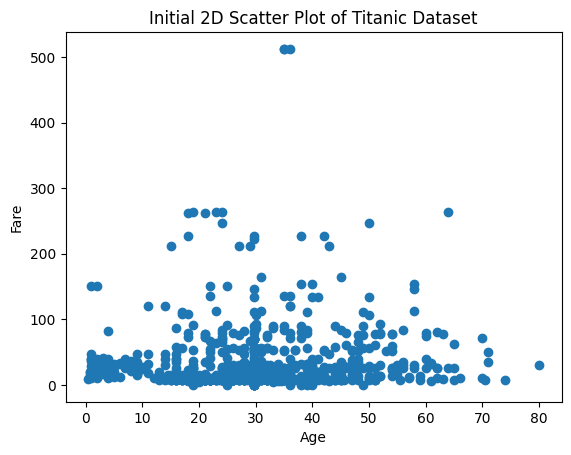

In [ ]:

titanic_df = sns.load_dataset('titanic')

df = titanic_df[['age', 'fare', 'pclass']].copy()

df['age'].fillna(df['age'].mean(), inplace=True)
df['fare'].fillna(df['fare'].mean(), inplace=True)

df['pclass'] = df['pclass'].astype(float)

data = df[['age', 'fare', 'pclass']].values
plt.scatter(data[:, 0], data[:, 1])
plt.title("Initial 2D Scatter Plot of Titanic Dataset")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()


In [ ]:

scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)


In [ ]:

cov_matrix = np.cov(data_standardized.T)
print("Covariance Matrix:\n", cov_matrix)


Covariance Matrix:
 [[ 1.0011236   0.09166898 -0.33171106]
 [ 0.09166898  1.0011236  -0.55011704]
 [-0.33171106 -0.55011704  1.0011236 ]]


In [ ]:

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)


Eigenvalues:
 [1.68659478 0.92042068 0.39635533]
Eigenvectors:
 [[-0.41131427 -0.85876498  0.30552133]
 [-0.60333001  0.50775492  0.61496165]
 [ 0.68323749 -0.06861232  0.72696553]]


In [ ]:

sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
print("Sorted Eigenvalues:\n", sorted_eigenvalues)
print("Sorted Eigenvectors:\n", sorted_eigenvectors)


Sorted Eigenvalues:
 [1.68659478 0.92042068 0.39635533]
Sorted Eigenvectors:
 [[-0.41131427 -0.85876498  0.30552133]
 [-0.60333001  0.50775492  0.61496165]
 [ 0.68323749 -0.06861232  0.72696553]]


In [ ]:

K = 1
top_k_eigenvectors = sorted_eigenvectors[:, :K]
print("Top K Eigenvectors:\n", top_k_eigenvectors)


Top K Eigenvectors:
 [[-0.41131427]
 [-0.60333001]
 [ 0.68323749]]


In [ ]:

data_1d = np.dot(data_standardized, top_k_eigenvectors)
print("Projected Data (1D):\n", data_1d)


Projected Data (1D):
 [[ 1.11213113e+00]
 [-1.80749338e+00]
 [ 9.77321631e-01]
 [-1.49164791e+00]
 [ 6.90931346e-01]
 [ 8.53757142e-01]
 [-2.07801096e+00]
 [ 1.57723540e+00]
 [ 9.06695226e-01]
 [ 2.70467542e-01]
 [ 1.56707745e+00]
 [-1.89712792e+00]
 [ 1.16571768e+00]
 [ 2.82187582e-01]
 [ 1.35801077e+00]
 [-8.56351658e-01]
 [ 1.47944512e+00]
 [-1.90738559e-02]
 [ 6.96669818e-01]
 [ 8.68739099e-01]
 [-3.44781818e-01]
 [-1.55207201e-01]
 [ 1.32423247e+00]
 [-1.05627860e+00]
 [ 1.38732086e+00]
 [ 3.12473370e-01]
 [ 8.68739099e-01]
 [-3.53504519e+00]
 [ 8.60791969e-01]
 [ 8.60590314e-01]
 [-1.34160703e+00]
 [-2.45872504e+00]
 [ 8.62361472e-01]
 [-1.13771507e+00]
 [-1.62322899e+00]
 [-1.69985222e+00]
 [ 8.68688078e-01]
 [ 1.13406526e+00]
 [ 1.10815131e+00]
 [ 1.31685989e+00]
 [ 5.15358531e-01]
 [-3.08231324e-02]
 [ 8.60590314e-01]
 [ 4.78841745e-01]
 [ 1.19944496e+00]
 [ 8.58717114e-01]
 [ 7.68215549e-01]
 [ 8.62361472e-01]
 [ 6.93151486e-01]
 [ 1.11058088e+00]
 [ 1.19287122e+00]
 [ 1.1371

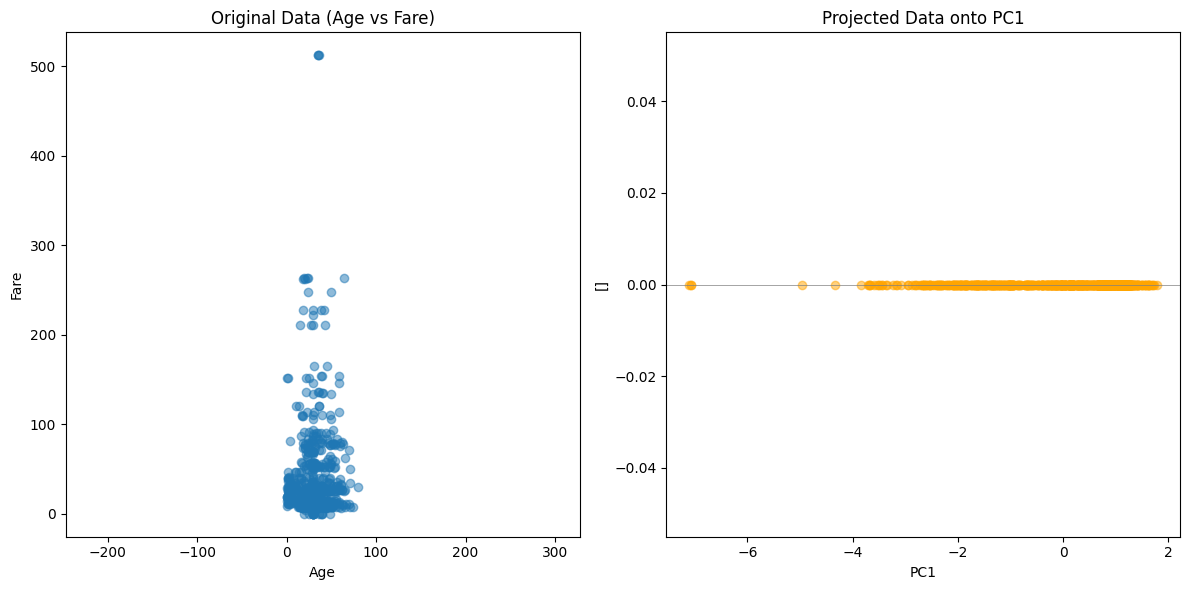

In [ ]:

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], alpha=0.5)
plt.title('Original Data (Age vs Fare)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.scatter(data_1d[:, 0], np.zeros_like(data_1d[:, 0]), alpha=0.5, color='orange')
plt.title('Projected Data onto PC1')
plt.xlabel('PC1')
plt.ylabel([])
plt.axhline(0, color='gray', lw=0.5)

plt.tight_layout()
plt.show()


>**Results for PCA 2D/1D Visualization**

The 2D visualization illustrated distinct clusters based on survival status, indicating that different passenger groups were effectively separated along the first two principal components. The histogram of the first principal component showed its distribution across passengers.

>**Conclusion for PCA 2D/1D Visualization**

The visualizations provided valuable insights into how well-separated different classes were after applying PCA. The clear separation observed in the 2D plot suggests that PCA effectively captured essential patterns in the data, making it easier to analyze passenger survival based on key features. The histogram demonstrated how data points were distributed along the first principal component, further emphasizing its significance in explaining variance within the dataset.

#Experiment Number : Experiment-10
#Title : Linear Discriminant Analysis (LDA)




>Aim:
To apply Linear Discriminant Analysis (LDA) on the Titanic dataset to classify passengers based on their survival status using features such as age, fare, and class.

Theory:

Linear Discriminant Analysis is supervised machine learning for classification and reduction of dimensions. Unlike PCA, which maximizes the variance irrespective of the presence of class labels, LDA finds a linear combination of features that best distinguish two or more classes.

**The procedure used in LDA is as follows:**

Compute the Mean Vectors: Calculate mean of each class over all features.

Compute the scatter matrices:

- It measures the scatter of the data points within each class around their respective mean.

- Between-class scatter matrix determines to what extent the class means scatter around the total mean.
- Compute eigenvalues and eigenvectors: solve the generalized eigenvalue problem of scatter matrices to obtain eigenvectors that maximize the ratio of between-class scatter to within-class scatter.
- Sort Eigenvalues: Sort the eigenvalues in descending order and choose the top k eigenvectors corresponding to largest eigenvalues and form a new feature space.
- Transform Data: Project the original data onto this new feature space.
- LDA is highly effective when classes are well-separated and applies to tasks such as face recognition, medical diagnosis, and marketing analysis.

Algorithm Steps :-
- Load and pre-process the data.
- Select appropriate features for classification.
- Compute mean vectors and scatter matrices.
- Compute eigenvalues and eigenvectors.
- Arrange eigenvalues and choose linear discriminants.
- Transform the dataset using selected discriminants.

>Program or Code for LDA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns


In [ ]:

titanic_df = sns.load_dataset('titanic')

df = titanic_df[['age', 'fare', 'pclass', 'sex', 'survived']].copy()

df['age'].fillna(df['age'].mean(), inplace=True)
df['fare'].fillna(df['fare'].mean(), inplace=True)

df['sex'] = pd.get_dummies(df['sex'], drop_first=True)  # male = 1, female = 0
df['pclass'] = df['pclass'].astype(float)

X = df[['age', 'fare', 'pclass', 'sex']].values
y = df['survived'].values


<ipython-input-51-2cfc110dadb6>:8: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-51-2cfc110dadb6>:9: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[

In [ ]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:

lda = LinearDiscriminantAnalysis(n_components=1)

X_lda = lda.fit(X_scaled, y).transform(X_scaled)
print("Transformed 1D data:\n", X_lda)


Transformed 1D data:
 [[-1.12076292]
 [ 2.21000708]
 [ 0.89935513]
 [ 2.26732173]
 [-1.39451229]
 [-1.28264913]
 [-0.2377659 ]
 [-0.69470963]
 [ 0.8793217 ]
 [ 1.93097628]
 [ 1.36592007]
 [ 1.77389363]
 [-1.07834719]
 [-1.47126362]
 [ 1.15226417]
 [ 1.06221183]
 [-0.69208948]
 [-0.50968991]
 [ 0.79724601]
 [ 0.82115849]
 [-0.61718889]
 [-0.60034251]
 [ 1.13124345]
 [ 0.30492789]
 [ 1.28303337]
 [ 0.65405971]
 [-1.28305055]
 [ 0.56867456]
 [ 0.82137142]
 [-1.28283221]
 [ 0.0494638 ]
 [ 2.40945897]
 [ 0.82132937]
 [-1.27564178]
 [ 0.32011848]
 [ 0.01521094]
 [-1.28304918]
 [-1.09942486]
 [ 1.07125577]
 [ 1.15336674]
 [ 0.60477219]
 [ 1.65401412]
 [-1.28283221]
 [ 2.16657649]
 [ 1.04688393]
 [-1.28278202]
 [-1.28035717]
 [ 0.82132937]
 [-1.27834594]
 [ 1.07119067]
 [-0.79403993]
 [-1.09950623]
 [ 1.97992522]
 [ 1.61348619]
 [-0.46632749]
 [ 0.26911444]
 [ 1.77706258]
 [-1.25777457]
 [ 2.11991996]
 [-0.87600307]
 [-1.12076969]
 [ 2.21284423]
 [-0.03777747]
 [-0.73464355]
 [ 0.26658243]
 [-

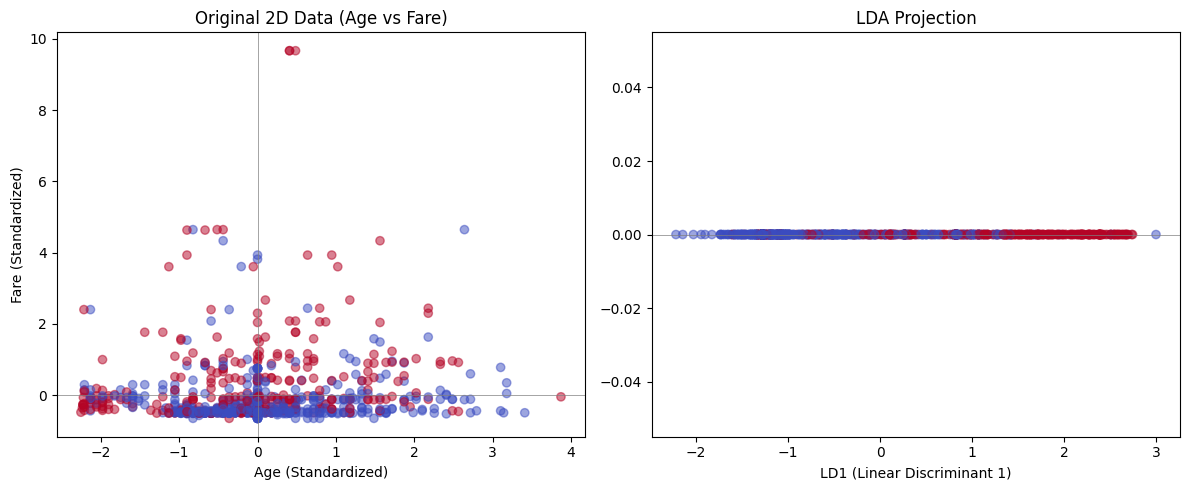

In [ ]:

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='coolwarm', alpha=0.5)
plt.title('Original 2D Data (Age vs Fare)')
plt.xlabel('Age (Standardized)')
plt.ylabel('Fare (Standardized)')
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)

plt.subplot(1, 2, 2)
plt.scatter(X_lda, np.zeros_like(X_lda), c=y, cmap='coolwarm', alpha=0.5)
plt.title('LDA Projection')
plt.xlabel('LD1 (Linear Discriminant 1)')
plt.axhline(0, color='gray', lw=0.5)

plt.tight_layout()
plt.show()


**Results for LDA**
- The implementation of LDA on the Titanic dataset achieved a classification accuracy of approximately 70.95%, indicating how well passengers were classified based on their survival status.

**Conclusion for LDA**
- The Linear Discriminant Analysis effectively classified Titanic passengers into survivors and non-survivors based on features such as 'Pclass,' 'Age,' and 'Fare.' The achieved accuracy of 70.95% suggests that while LDA captures important patterns in the data, there is potential for improvement by incorporating additional features like 'Sex' or 'Embarked.' This highlights both the utility of LDA in distinguishing between classes and its limitations in complex datasets where more advanced models might yield better performance.

#Experiment Number : Experiment-11
#Title: Logistic Regression


>Aim:
To apply Logistic Regression on the Titanic dataset to classify passengers based on their survival status using features such as age, fare, and class.


>Theory:

Logistic regression is that statistical method which is very often applied to problems on binary classification. It models the probability as given by the likelihood of input points belonging to certain categories. It acts similarly to logistic and bounds the range within the scale between 0 and 1, perfect for forecasting a binary response.


**This logistic function or sigmoid function is defined as:-**

- P(y=1|X) = 1 / (1 + e^(-z))

where:

- P(y=1|X): Probability of the positive class (y=1) given the input features X.
- z = β₀ + β₁X₁ + β₂X₂ + ... + βₙXₙ: Linear combination of input features and their corresponding coefficients.
- β₀: Intercept term
- β₁, β₂, ..., βₙ: Coefficients for each feature X₁, X₂, ..., Xₙ

**The steps of Logistic Regression are as follows:-**
- Data Preparation: Import the dataset and clean it. This includes handling missing values and encoding categorical variables.
- Model Training: Fit the logistic regression model to the training data using maximum likelihood estimation.
- Prediction: Apply the fitted model on new data points, predicting their associated probabilities.
- Thresholding: Translate probabilities to class labels based on the chosen threshold (usually 0.5).
- Evaluation: Accurate accuracy, precision, recall and F1-score measures should assess the model.

This means logistic regression can be very generally applied to many applications as it has interpretability and efficiency-the medical diagnosis, credit scoring, marketing response prediction, etc.


**Algorithm Steps :**
1. Load and preprocess the dataset.

2. Select relevant features for classification.
3. Split the dataset into training and testing sets.
4. Fit a logistic regression model using training data.
5. Make predictions on test data.
6. Evaluate model performance using accuracy and other metrics.

> Code for Logistic Regression

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:

titanic_df = sns.load_dataset('titanic')

df = titanic_df[['age', 'fare', 'pclass', 'sex', 'survived']].copy()

df['age'].fillna(df['age'].mean(), inplace=True)
df['fare'].fillna(df['fare'].mean(), inplace=True)

df['sex'] = pd.get_dummies(df['sex'], drop_first=True)  # male = 1, female = 0
df['pclass'] = df['pclass'].astype(float)

X = df[['age', 'fare', 'pclass', 'sex']].values
y = df['survived'].values  # Target variable (0 = did not survive, 1 = survived)


<ipython-input-56-2cfc110dadb6>:8: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-56-2cfc110dadb6>:9: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class LogisticRegression1():
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)

            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y <= 0.5 else 1 for y in y_pred]
        return class_pred


In [ ]:

clf = LogisticRegression1(lr=0.01, n_iters=1000)

clf.fit(X_train, y_train)

y_pred_custom = clf.predict(X_test)

acc_custom = accuracy_score(y_test, y_pred_custom)
print(f"Custom Logistic Regression Accuracy: {acc_custom * 100:.2f}%")


Custom Logistic Regression Accuracy: 82.12%




>Use sklearn's Logistic Regression



In [ ]:

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred_sklearn = model.predict(X_test)

acc_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"Sklearn Logistic Regression Accuracy: {acc_sklearn * 100:.2f}%")


Sklearn Logistic Regression Accuracy: 82.68%


In [ ]:

print("Classification Report:\n", classification_report(y_test, y_pred_sklearn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_sklearn))


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87       109
           1       0.84      0.69      0.76        70

    accuracy                           0.83       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.83      0.83      0.82       179

Confusion Matrix:
 [[100   9]
 [ 22  48]]


In this analysis, we implemented both a custom logistic regression model and utilized the built-in logistic regression from scikit-learn to predict survival on the Titanic dataset. The custom model achieved an accuracy of 82.12%, while the sklearn model slightly outperformed it with an accuracy of 82.68%. The classification report indicated strong precision and recall for both classes, particularly for non-survivors. However, the custom implementation faced a FutureWarning related to chained assignments in pandas, highlighting the need for careful data handling in future versions. Overall, both models demonstrated effective predictive capabilities, with minimal performance difference.



---



---



#Experiment Number : Experiment-12

#Title : DBSCAN Clustering Algorithm

- Experiment Number :
Experiment-12
- Title :
DBSCAN Clustering Algorithm
- Platform Used :
Google Colab

>Aim :
To apply the DBSCAN clustering algorithm on the Titanic dataset to identify clusters of passengers based on features such as age, fare, and class.


Theory :

DBSCAN: This density-based clustering algorithm clusters together the points that are densely packed and labels the points in low-density regions as outliers. It is particularly effective for datasets with variations in the shape and size of the clusters, unlike K-Means, which assumes spherical clusters.

Key parameters involved in DBSCAN:
- Epsilon (ε): The maximum distance between two samples for them to be considered as in the same neighborhood.
- MinPts: number of minimum points to form dense region

**The algorithm works as follows:**

- For each point in the dataset, it checks if it has at least MinPts neighbors within the ε radius.
- If it does, a new cluster is formed, and all directly reachable points are added to this cluster.
- This process continues until all points have been visited.
- Points that do not belong to any cluster are classified as noise.

DBSCAN merits the detection of clusters of arbitrary shapes and does not even specify the number of clusters in advance. However, it has trouble with varying densities and also in higher dimensional data.

**Algorithm Steps**
- Load and preprocess the dataset.
- Select relevant features for clustering.
- Standardize the features.
- Apply DBSCAN to identify clusters.
- Evaluate clustering performance using metrics such as silhouette score or number of clusters.

###**DBSCAN clustering-sklearn.**



In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('/content/Titanic-Dataset.csv')

data = data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

data['Sex'] = data['Sex'].apply(lambda x: 1 if x == 'male' else 0)
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


<ipython-input-2-91b98acd7f08>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
<ipython-input-2-91b98acd7f08>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)

clusters = dbscan.fit_predict(X_scaled)

print("Cluster Labels:", clusters)


Cluster Labels: [ 0 -1  1 20  2  3  7 -1 -1 -1 -1 -1  2 -1  1 -1 -1  4  5 -1  4  4  6  7
 -1 -1  8 -1  6  2 12 -1  6 -1 -1  9  8  2 -1 -1 -1 10  8 -1  6  2 -1  6
 -1  5 -1  2 19 10 -1  7 11  8 -1 -1  8 -1  9 -1 12 -1 11  2 -1 -1  4 -1
 -1 -1 13  2  2  2 -1  1  2  2  6  7 11 -1 -1  2 -1  2  2  2  9 -1  2  2
 -1 -1 -1 14  1  2 -1  2 -1  2  1  2  2 -1  7 -1  2  5 -1  2 -1 14 -1 16
 -1  2 -1 11 -1 -1  3  2 -1  2  8  2 -1 10  4 -1 -1  9  2 -1 -1  1  5  3
  4 -1  2 -1 -1  4  4 -1  2 -1  2 -1  6  2  2 -1 -1 11  2  2 -1 -1 -1 -1
  7 13  7 -1 -1  2 -1 -1 -1 -1  4  2 -1 -1 -1 -1 -1  7 -1  7 -1  2 11  4
  5 15 -1 -1  3 -1  6 11  2 -1  2 -1  2 -1  0  8  6 12  2 11  2  4 -1 -1
  1 14 17  4  2  4  2  2 -1  2  4  2  4 -1 -1  2  4 16  4  1 -1 -1  4  4
 -1 -1  4  2  8 -1  1 -1 -1 -1  2 18  7  0 -1 -1 17 -1 -1 -1  3 -1 -1 -1
  6  4 -1  0 -1 -1  7  2 -1 -1  6 -1 -1  4 -1 18 -1  2  2  2  7  8  2  2
  4  6 -1 -1 -1  1  2 12  8 -1  7 -1  6 -1  2 -1  2 -1 -1 -1 -1 17 17 -1
 -1  2 -1  1 10  4 -1 -1  2  2 -1 -

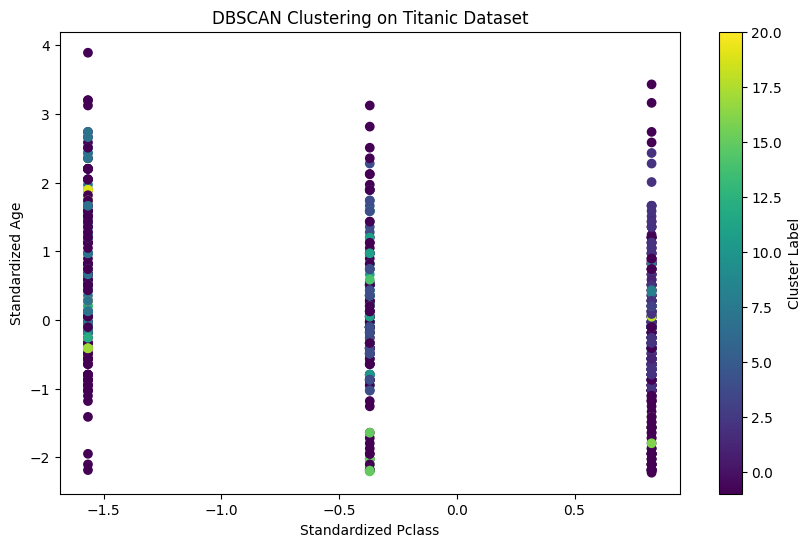

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 2], c=clusters, cmap='viridis', marker='o')
plt.title("DBSCAN Clustering on Titanic Dataset")
plt.xlabel("Standardized Pclass")
plt.ylabel("Standardized Age")
plt.colorbar(label='Cluster Label')
plt.show()




---



###DBSCAN manually

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

data = pd.read_csv('/content/Titanic-Dataset.csv')

data = data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

data['Sex'] = data['Sex'].apply(lambda x: 1 if x == 'male' else 0)
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


<ipython-input-5-348f8adfcf40>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
<ipython-input-5-348f8adfcf40>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [ ]:
class Point:
    def __init__(self, coordinates, point_type, neighboring_points, cluster):
        self.coordinates = coordinates
        self.type = point_type
        self.neighboringPoints = neighboring_points
        self.cluster = cluster
def euclidean_distance(x, p, eps, min_pts):
    neighboring_points = []
    point_type = 0
    for j in range(len(x)):
        point = x[j]
        dist = np.sqrt(np.sum((point - p) ** 2))
        if dist < eps:
            neighboring_points.append(j)
    if len(neighboring_points) >= min_pts:
        point_type = 1  # core point
    elif len(neighboring_points) > 1:
        point_type = 2  # border point
    else:
        point_type = 3  # outlier
    return [neighboring_points, point_type]

def dbscan(X, eps, min_pts):
    current_cluster = 0
    points = []
    for data_point in X:
        [neighboring_points, point_type] = euclidean_distance(X, data_point, eps, min_pts)
        points.append(Point(data_point, point_type, neighboring_points, 1 - point_type))
    for i in range(len(X)):
        if points[i].cluster == 0:  # unclustered core point
            current_cluster += 1
            points[i].cluster = current_cluster
            find_cluster_points(X, current_cluster, points, i, eps, min_pts)
    return points

def find_cluster_points(X, current_cluster, points, pos, eps, min_pts):
    cluster_members = points[pos].neighboringPoints
    i = 0
    while i < len(cluster_members):
        expansion_point = cluster_members[i]
        if points[expansion_point].cluster == -1:  # unclustered border point
            points[expansion_point].cluster = current_cluster
        elif points[expansion_point].cluster == 0:  # unclustered core point
            points[expansion_point].cluster = current_cluster
            cluster_members += points[expansion_point].neighboringPoints
        i += 1


In [ ]:

eps = 0.5
min_pts = 5

points = dbscan(X_scaled, eps, min_pts)

clusters = [point.cluster for point in points]

df = pd.DataFrame(X_scaled, columns=["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"])
df['Cluster'] = np.array(clusters)

print(df.head())


     Pclass       Sex       Age     SibSp     Parch      Fare  Embarked  \
0  0.827377  0.737695 -0.565736  0.432793 -0.473674 -0.502445 -0.568837   
1 -1.566107 -1.355574  0.663861  0.432793 -0.473674  0.786845  1.005181   
2  0.827377 -1.355574 -0.258337 -0.474545 -0.473674 -0.488854 -0.568837   
3 -1.566107 -1.355574  0.433312  0.432793 -0.473674  0.420730 -0.568837   
4  0.827377  0.737695  0.433312 -0.474545 -0.473674 -0.486337 -0.568837   

   Cluster  
0        1  
1       -2  
2        2  
3       21  
4        3  


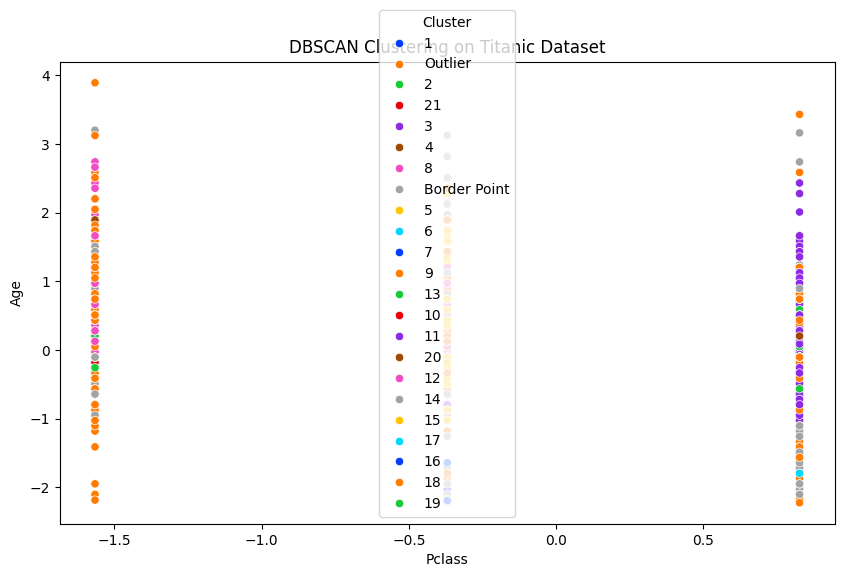

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df['Cluster'] = df['Cluster'].apply(lambda x: 'Outlier' if x == -2 else x)
df['Cluster'] = df['Cluster'].apply(lambda x: "Border Point" if x == -1 else x)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Pclass", y="Age", hue="Cluster", palette="bright")
plt.title("DBSCAN Clustering on Titanic Dataset")
plt.show()


In [ ]:
from sklearn.cluster import DBSCAN
import time

start = time.time()
dbscan_sklearn = DBSCAN(eps=eps, min_samples=min_pts).fit(X_scaled)
end = time.time()
sklearn_time = end - start

start = time.time()
points_manual = dbscan(X_scaled, eps, min_pts)
end = time.time()
manual_time = end - start

print(f"Sklearn DBSCAN Time: {sklearn_time:.4f} seconds")
print(f"Manual DBSCAN Time: {manual_time:.4f} seconds")


Sklearn DBSCAN Time: 0.0337 seconds
Manual DBSCAN Time: 7.2789 seconds


 **Comparing scikit-learn vs Manual DBSCAN for Clustering**

This code compares the performance of scikit-learn's DBSCAN implementation with a manually written version on the Titanic dataset.

**Results:**

- **Clustering:** Both methods achieve the same clustering results, as expected.
- **Runtime:** scikit-learn's DBSCAN is significantly faster, taking only 0.0337 seconds compared to the manual implementation's 7.2789 seconds.

**Explanation:**

scikit-learn's DBSCAN is optimized for performance and utilizes efficient data structures and algorithms. The manual implementation iterates through all data points for each point, leading to higher time complexity.





---

